<a href="https://colab.research.google.com/github/fabriziobasso/Colab_backup/blob/main/File_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **S4E10 - LOAN APPROVAL**

In [1]:
%%capture
!pip install -qq pytorch_tabnet
!pip install optuna
!pip install catboost
!pip install optuna-integration-pytorch-tabnet

from pytorch_tabnet.tab_model import TabNetRegressor

!pip install --upgrade category-encoders
!pip install optuna-integration
!pip install colorama
#!pip install pyfiglet
!pip install keras-tuner --upgrade
!pip install keras-nlp
!pip install BorutaShap
!pip install --upgrade scikit-learn
!pip install scikit-lego
!pip install skops

from pytorch_tabnet.tab_model import TabNetRegressor

In [2]:
# Setup notebook
from pathlib import Path
import ipywidgets as widgets
import pandas as pd
import numpy as np
from pickle import load, dump
import json
import joblib
#import calplot as cal

# Graphic Libraries:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
# Set Style
sns.set_style("whitegrid",{"grid.linestyle":"--", 'grid.linewidth':0.2, 'grid.alpha':0.5});
sns.despine(left=True, bottom=True, top=False, right=False);
mpl.rcParams['figure.dpi'] = 120;
mpl.rc('axes', labelsize=12);
plt.rc('xtick',labelsize=10);
plt.rc('ytick',labelsize=10);

mpl.rcParams['axes.spines.top'] = False;
mpl.rcParams['axes.spines.right'] = False;
mpl.rcParams['axes.spines.left'] = True;

# Palette Setup
colors = ['#FB5B68','#FFEB48','#2676A1','#FFBDB0',]
colormap_0 = mpl.colors.LinearSegmentedColormap.from_list("",colors)
palette_1 = sns.color_palette("coolwarm", as_cmap=True)
palette_2 = sns.color_palette("YlOrBr", as_cmap=True)
palette_3 = sns.light_palette("red", as_cmap=True)
palette_4 = sns.color_palette("viridis", as_cmap=True)
palette_5 = sns.color_palette("rocket", as_cmap=True)
palette_6 = sns.color_palette("GnBu", as_cmap=True)
palette_7 = sns.color_palette("tab20c", as_cmap=False)
palette_8 = sns.color_palette("Set2", as_cmap=False)

palette_custom = ['#fbb4ae','#b3cde3','#ccebc5','#decbe4','#fed9a6','#ffffcc','#e5d8bd','#fddaec','#f2f2f2']
palette_9 = sns.color_palette(palette_custom, as_cmap=False)

# tool for Excel:
from openpyxl import load_workbook, Workbook
from openpyxl.drawing.image import Image
from openpyxl.styles import Border, Side, PatternFill, Font, GradientFill, Alignment
from openpyxl.worksheet.cell_range import CellRange

from openpyxl.formatting import Rule
from openpyxl.styles import Font, PatternFill, Border
from openpyxl.styles.differential import DifferentialStyle

# Bloomberg
#from xbbg import blp
from catboost import CatBoostRegressor, Pool, CatBoostClassifier
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from xgboost.callback import EarlyStopping

import lightgbm as lgb
from lightgbm import (LGBMRegressor,
                      LGBMClassifier,
                      early_stopping,
                      record_evaluation,
                      log_evaluation)

# Time Management
from tqdm import tqdm
from datetime import date
from datetime import datetime
from pandas.tseries.offsets import BMonthEnd, QuarterEnd
import datetime
from pandas.tseries.offsets import BDay # BDay is business day, not birthday...
import datetime as dt
import click
import glob
import os
import gc
import re
import string

from ipywidgets import AppLayout
from ipywidgets import Dropdown, Layout, HTML, AppLayout, VBox, Label, HBox, BoundedFloatText, interact, Output

#from my_func import *

import optuna
from optuna.integration import TFKerasPruningCallback
from optuna.trial import TrialState
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_contour

os.environ["KERAS_BACKEND"] = "tensorflow"

import numpy as np
import tensorflow as tf
import keras
from keras import ops
from keras import layers

from keras.layers import Input, LSTM, Dense, Lambda, RepeatVector, Reshape
from keras.models import Model
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError

from keras.utils import FeatureSpace, plot_model

# Import libraries for Hypertuning
import keras_tuner as kt
from keras_tuner.tuners import RandomSearch, GridSearch, BayesianOptimization

#from my_func import *

# preprocessing modules
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, RepeatedKFold, cross_val_score, cross_validate, GroupKFold, GridSearchCV, RepeatedStratifiedKFold, cross_val_predict
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import (LabelEncoder,
                                   StandardScaler,
                                   MinMaxScaler,
                                   OrdinalEncoder,
                                   RobustScaler,
                                   PowerTransformer,
                                   OneHotEncoder,
                                   QuantileTransformer,
                                   PolynomialFeatures)

# metrics
import sklearn
#import skops.io as sio
from sklearn.metrics import (mean_squared_error,
                             root_mean_squared_error,
                             root_mean_squared_log_error,
                             r2_score,
                             mean_absolute_error,
                             mean_absolute_percentage_error,
                             classification_report,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             multilabel_confusion_matrix,
                             accuracy_score,
                             roc_auc_score,
                             auc,
                             roc_curve,
                             log_loss,
                             make_scorer)
# modeling algos
from sklearn.linear_model import (LogisticRegression,
                                  Lasso,
                                  ridge_regression,
                                  LinearRegression,
                                  Ridge,
                                  RidgeCV,
                                  ElasticNet,
                                  BayesianRidge,
                                  HuberRegressor,
                                  TweedieRegressor,
                                  QuantileRegressor,
                                  ARDRegression,
                                  TheilSenRegressor,
                                  PoissonRegressor,
                                  GammaRegressor)

from sklearn.ensemble import (AdaBoostRegressor,
                              AdaBoostClassifier,
                              RandomForestRegressor,
                              RandomForestClassifier,
                              VotingRegressor,
                              GradientBoostingRegressor,
                              GradientBoostingClassifier,
                              StackingRegressor,
                              StackingClassifier,
                              HistGradientBoostingClassifier,
                              HistGradientBoostingRegressor,
                              ExtraTreesClassifier)

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline

from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

from sklearn.multioutput import RegressorChain
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor

import itertools
import warnings
from openpyxl import load_workbook

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

import statsmodels.api as sm
from pylab import rcParams
import scipy.stats as ss

from category_encoders.cat_boost import CatBoostEncoder
from category_encoders.wrapper import PolynomialWrapper
from category_encoders.count import CountEncoder
from category_encoders import TargetEncoder

warnings.filterwarnings('ignore')
#import pyfiglet
#plt.style.use('fivethirtyeight')

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


<Figure size 640x480 with 0 Axes>

In [3]:
sns.set({"axes.facecolor"       : "#ffffff",
         "figure.facecolor"     : "#ffffff",
         "axes.edgecolor"       : "#000000",
         "grid.color"           : "#ffffff",
         "font.family"          : ['Cambria'],
         "axes.labelcolor"      : "#000000",
         "xtick.color"          : "#000000",
         "ytick.color"          : "#000000",
         "grid.linewidth"       : 0.5,
         'grid.alpha'           :0.5,
         "grid.linestyle"       : "--",
         "axes.titlecolor"      : 'black',
         'axes.titlesize'       : 12,
#         'axes.labelweight'     : "bold",
         'legend.fontsize'      : 7.0,
         'legend.title_fontsize': 7.0,
         'font.size'            : 7.5,
         'xtick.labelsize'      : 7.5,
         'ytick.labelsize'      : 7.5,
        });

sns.set_style("whitegrid",{"grid.linestyle":"--", 'grid.linewidth':0.2, 'grid.alpha':0.5})
# Set Style
mpl.rcParams['figure.dpi'] = 120;

# import font colors
from colorama import Fore, Style, init

# Making sklearn pipeline outputs as dataframe:-
pd.set_option('display.max_columns', 100);
pd.set_option('display.max_rows', 50);

sns.despine(left=True, bottom=True, top=False, right=False)

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

init(autoreset=True)

<Figure size 960x660 with 0 Axes>

In [4]:
from tqdm import tqdm
from itertools import product

import numpy as np
import pandas as pd
import gc
import matplotlib.pyplot as plt
import seaborn as sns

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import GroupKFold
from sklearn.impute import SimpleImputer
import torch

import warnings
warnings.filterwarnings("ignore")

# Connect to Colab:#
from google.colab import drive
import os
drive.mount('/content/drive')

Mounted at /content/drive


<div style="text-align:center; border-radius:15px; padding:15px; margin:0; font-size:100%; font-family:Arial, sans-serif; background-color:#A8DADC; color:#1D3557; overflow:hidden; box-shadow:0 3px 6px rgba(0, 0, 0, 0.2);">
    <h3>Loading and Preprocessing Data for Compatibility</h3>
</div>


In [5]:
df_train = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S5E2/X_enc_ext.csv",index_col=0)

df_test = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S5E2/test_enc_ext.csv",index_col=0)

# df_train_orig = pd.read_csv(
#     '/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E10/credit_risk_dataset.csv'
# )

df_subm = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S5E2/sample_submission.csv",index_col=0)

# df_orig = pd.read_csv(
#     "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/Insurance Premium Prediction Dataset.csv",
#      parse_dates=['Policy Start Date'],
#     #     index_col='id',
# )

In [6]:
df_train.head()
df_train.shape,df_test.shape

((3994318, 31), (200000, 30))

In [9]:
#df_train_orig.isna().sum()
df_train.head()

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Weight Capacity (kg)_missing,Mat_Siz_Col,Siz_Lap_Col,Bra_Siz_Wat,Siz_Lap_Wat,Mat_Lap_Wat,Bra_Siz_Sty,Bra_Lap_Wat,Siz_Com_Lap,Siz_Lap_Sty,Mat_Com_Lap,Mat_Siz_Com,Bra_Siz_Com,Com_Lap_Wat,Bra_Siz_Lap,Bra_Mat_Siz,Siz_Com_Wat,Siz_Com_Sty,TE_wc,skew_0,skew_1,Price
0,1,1,1,7,2,1,3,0,-0.917722,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.261445,-0.292388,-0.428820,112.15875
1,1,0,3,1,2,2,1,3,1.300573,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.621130,-0.302957,-0.460902,68.88056
2,5,1,3,2,2,1,1,6,-0.196013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.016408,-0.301780,-1.112454,39.17320
3,3,3,3,8,2,1,1,3,-0.727615,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.498987,-0.301780,-0.551413,80.60793
4,0,0,1,0,2,2,1,3,-0.037447,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.016408,-0.375870,0.519525,86.02312


In [10]:
def plot_scatter(x="Price",y="TE_wc", df=df_train):

  plt.figure(figsize=(5,5))
  plt.scatter(df[x],df[y])
  plt.xlabel(x)
  plt.ylabel(y)
  plt.show()

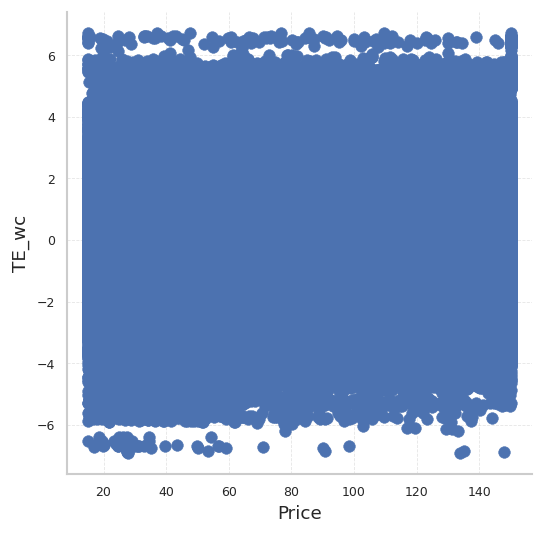

In [11]:
plot_scatter(x="Price",y="TE_wc")

In [13]:
#df_train["person_emp_length"].describe()

In [12]:
#df_train[df_train["cb_person_cred_hist_length"]>0.75*df_train["person_age"]]
#np.round(df_train["cb_person_cred_hist_length"].mean(),0).astype(int)

**Descriptions of Loan Data**

Descriptions for the column names based on the data provided:

* **id**: Unique identifier for each record.
* **person_age**: Age of the individual, categorized into ranges.
* **person_income**: Income of the individual, categorized into income ranges.
* **person_home_ownership**: Homeownership status, which includes categories like 'RENT', 'MORTGAGE', etc.
* **person_emp_length**: Employment length of the individual, categorized into ranges based on years.
* **loan_intent**: The purpose of the loan, with categories such as 'EDUCATION', 'MEDICAL', etc.
* **loan_grade**: The credit grade of the loan, such as 'A', 'B', etc.
* **loan_amnt**: Loan amount, categorized into ranges.
* **loan_int_rate**: Loan interest rate, categorized into percentage ranges.
* **loan_percent_income**: Percentage of the individual’s income that the loan represents, categorized into - ranges.
* **cb_person_default_on_file**: Whether the person has a history of loan default, with values 'true' or 'false'.
* **cb_person_cred_hist_length**: Length of the individual’s credit history, categorized into ranges.
* **loan_status**: with values representing whether the loan status approval( binary values)

The dataset is a about loan applications, including personal, financial, and loan details. It's likely used for predicting whether a person will default on a loan, making it a binary classification problem. The goal is to figure out which applicants are at higher risk of not paying back their loans based on their age, income, employment, loan purpose, credit history, and other related information.

In [23]:
class Config:

    state = 42
    n_splits = 10
    early_stop = 200

    target = 'Price'
    train = pd.read_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S5E2/X_enc_ext.csv', index_col=0)
    test = pd.read_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S5E2/test_enc_ext.csv', index_col=0)
    submission = pd.read_csv( "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S5E2/sample_submission.csv", index_col=0)
    train_org = None

    original_data = 'N'
    outliers = 'N'
    log_trf = 'N'
    scaler_trf = 'Y'
    feature_eng = 'N'
    missing = 'Y'
    force_normalization="N"
    impose_normalization="N"
    trg_enc = "N"
    metric_goal="rmse"
    direction_="minimize"
    log_trans_cols = []
    force_norm_cols = []
    impose_norm_cols = []
    trg_enc_feat = []

In [24]:
class Preprocessing():

    def __init__(self):
        self.train = Config.train
        self.test = Config.test
        self.targets = Config.target

        self.prp_data()

    def prp_data(self):

        if Config.original_data == 'Y':
            self.train = pd.concat([self.train, Config.train_org], ignore_index=True).drop_duplicates(ignore_index=True)
        if 'id' in self.train.columns:
            self.train = self.train.drop(['id'], axis=1)
            self.test = self.test.drop(['id'], axis=1)

        self.cat_features = self.train.drop(self.targets, axis=1).select_dtypes(include=['object', 'bool']).columns.tolist()
        self.num_features = self.train.drop(self.targets, axis=1).select_dtypes(exclude=['object', 'bool']).columns.tolist()

        self.train = self.reduce_mem(self.train)
        self.test = self.reduce_mem(self.test)
        return self

    def reduce_mem(self, df):

        numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64', "uint16", "uint32", "uint64"]

        for col in df.columns:
            col_type = df[col].dtypes

            if col_type in numerics:
                c_min = df[col].min()
                c_max = df[col].max()

                if "int" in str(col_type):
                    if c_min >= np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                        df[col] = df[col].astype(np.int32)
                    elif c_min >= np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                        df[col] = df[col].astype(np.int32)
                    elif c_min >= np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                        df[col] = df[col].astype(np.int32)
                    elif c_min >= np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                        df[col] = df[col].astype(np.int64)
                else:
                    if c_min >= np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                        df[col] = df[col].astype(np.float32)
                    if c_min >= np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                        df[col] = df[col].astype(np.float32)
                    else:
                        df[col] = df[col].astype(np.float64)

        return df

In [25]:
class EDA(Config, Preprocessing):

    def __init__(self):
        super().__init__()

        self.data_info()
        self.heatmap()
        self.dist_plots()
        self.cat_feature_plots()
        self.target_pie()

    def data_info(self):

        for data, label in zip([self.train, self.test], ['Train', 'Test']):
            table_style = [{'selector': 'th:not(.index_name)',
                            'props': [('background-color', 'slategrey'),
                                      ('color', '#FFFFFF'),
                                      ('font-weight', 'bold'),
                                      ('border', '1px solid #DCDCDC'),
                                      ('text-align', 'center')]
                            },
                            {'selector': 'tbody td',
                             'props': [('border', '1px solid #DCDCDC'),
                                       ('font-weight', 'normal')]
                            }]
            print(Style.BRIGHT+Fore.RED+f'\n{label} head\n')
            display(data.head().style.set_table_styles(table_style))

            print(Style.BRIGHT+Fore.RED+f'\n{label} info\n'+Style.RESET_ALL)
            display(data.info())

            print(Style.BRIGHT+Fore.RED+f'\n{label} describe\n')
            display(data.describe().drop(index='count', columns=self.targets, errors = 'ignore').T
                    .style.set_table_styles(table_style).format('{:.3f}'))

            print(Style.BRIGHT+Fore.RED+f'\n{label} missing values\n'+Style.RESET_ALL)
            display(data.isna().sum())
        return self

    def heatmap(self):
        print(Style.BRIGHT+Fore.RED+f'\nCorrelation Heatmap\n')
        plt.figure(figsize=(7,7))
        corr = self.train.select_dtypes(exclude='object').corr(method='pearson')
        sns.heatmap(corr, fmt = '0.2f', cmap = 'Blues', annot=True, cbar=False)
        plt.show()

    def dist_plots(self):

        print(Style.BRIGHT+Fore.RED+f"\nDistribution analysis - Numerical\n")
        df = pd.concat([self.train[self.num_features].assign(Source = 'Train'),
                        self.test[self.num_features].assign(Source = 'Test'),],
                        axis=0, ignore_index = True)

        fig, axes = plt.subplots(len(self.num_features), 2 ,figsize = (18, len(self.num_features) * 6),
                                 gridspec_kw = {'hspace': 0.3,
                                                'wspace': 0.2,
                                                'width_ratios': [0.70, 0.30]
                                               }
                                )
        for i,col in enumerate(self.num_features):
            ax = axes[i,0]
            sns.kdeplot(data = df[[col, 'Source']], x = col, hue = 'Source',
                        palette = ['royalblue', 'tomato'], ax = ax, alpha=0.7, linewidth = 2
                       )
            ax.set(xlabel = '', ylabel = '')
            ax.set_title(f"\n{col}")
            ax.grid('--',alpha=0.7)

            ax = axes[i,1]
            sns.boxplot(data = df, y = col, x=df.Source, width = 0.5,
                        linewidth = 1, fliersize= 1,
                        ax = ax, palette=['royalblue', 'tomato']
                       )
            ax.set_title(f"\n{col}")
            ax.set(xlabel = '', ylabel = '')
            ax.tick_params(axis='both', which='major')
            ax.set_xticklabels(['Train', 'Test'])

        plt.tight_layout()
        plt.show()

    def cat_feature_plots(self):
        print(Style.BRIGHT+Fore.RED+f"\nDistribution analysis - Categorical\n")
        fig, axes = plt.subplots(len(self.cat_features), 2 ,figsize = (18, len(self.cat_features) * 6),
                                 gridspec_kw = {'hspace': 0.5,
                                                'wspace': 0.2,
                                               }
                                )

        for i, col in enumerate(self.cat_features):

            ax = axes[i,0]
            sns.barplot(data=self.train[col].value_counts().nlargest(10).reset_index(), x=col, y='count', ax=ax, color='royalblue', alpha=0.7)
            ax.set(xlabel = '', ylabel = '')
            ax.set_title(f"\n{col} Train")

            ax = axes[i,1]
            sns.barplot(data=self.test[col].value_counts().nlargest(10).reset_index(), x=col, y='count', ax=ax, color='tomato', alpha=0.7)
            ax.set(xlabel = '', ylabel = '')
            ax.set_title(f"\n{col} Test")

        plt.tight_layout()
        plt.show()

    def target_pie(self):
        print(Style.BRIGHT+Fore.RED+f"\nTarget feature distribution\n")
        targets = self.train[self.targets]
        plt.figure(figsize=(6, 6))
        plt.pie(targets.value_counts(), labels=targets.value_counts().index, autopct='%1.2f%%', colors=palette_9)
        plt.show()

## 1.0 EDA


Train head



,Unnamed: 0,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Weight Capacity (kg)_missing,Mat_Siz_Col,Siz_Lap_Col,Bra_Siz_Wat,Siz_Lap_Wat,Mat_Lap_Wat,Bra_Siz_Sty,Bra_Lap_Wat,Siz_Com_Lap,Siz_Lap_Sty,Mat_Com_Lap,Mat_Siz_Com,Bra_Siz_Com,Com_Lap_Wat,Bra_Siz_Lap,Bra_Mat_Siz,Siz_Com_Wat,Siz_Com_Sty,TE_wc,skew_0,skew_1,Price
0,0,1,1,1,7,2,1,3,0,-0.917722,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.261445,-0.292388,-0.428820,112.158752
1,1,1,0,3,1,2,2,1,3,1.300573,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.621130,-0.302957,-0.460902,68.880562
2,2,5,1,3,2,2,1,1,6,-0.196013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.016408,-0.301780,-1.112454,39.173199
3,3,3,3,3,8,2,1,1,3,-0.727615,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.498987,-0.301780,-0.551413,80.607933
4,4,0,0,1,0,2,2,1,3,-0.037447,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.016408,-0.375870,0.519525,86.023117



Train info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3994318 entries, 0 to 3994317
Data columns (total 32 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Unnamed: 0                    int32  
 1   Brand                         int32  
 2   Material                      int32  
 3   Size                          int32  
 4   Compartments                  int32  
 5   Laptop Compartment            int32  
 6   Waterproof                    int32  
 7   Style                         int32  
 8   Color                         int32  
 9   Weight Capacity (kg)          float32
 10  Weight Capacity (kg)_missing  int32  
 11  Mat_Siz_Col                   int32  
 12  Siz_Lap_Col                   int32  
 13  Bra_Siz_Wat                   int32  
 14  Siz_Lap_Wat                   int32  
 15  Mat_Lap_Wat                   int32  
 16  Bra_Siz_Sty                   int32  
 17  Bra_Lap_Wat                   int32  
 18  Siz_Com_L

None


Train describe



,mean,std,min,25%,50%,75%,max
Unnamed: 0,1997158.500,1153060.431,0.000,998579.250,1997158.500,2995737.750,3994317.000
Brand,2.585,1.843,0.000,1.000,3.000,4.000,5.000
Material,2.070,1.563,0.000,1.000,3.000,4.000,4.000
Size,1.314,1.222,0.000,0.000,1.000,3.000,3.000
Compartments,4.436,2.881,0.000,2.000,4.000,7.000,9.000
Laptop Compartment,1.469,0.546,0.000,1.000,1.000,2.000,2.000
Waterproof,1.469,0.544,0.000,1.000,1.000,2.000,2.000
Style,1.360,1.230,0.000,0.000,1.000,3.000,3.000
Color,2.899,2.083,0.000,1.000,3.000,5.000,6.000
Weight Capacity (kg),-0.000,0.999,-1.866,-0.852,0.006,0.857,1.720



Train missing values



,0
Unnamed: 0,0
Brand,0
Material,0
Size,0
Compartments,0
Laptop Compartment,0
Waterproof,0
Style,0
Color,0
Weight Capacity (kg),0



Test head



,Unnamed: 0,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Weight Capacity (kg)_missing,Mat_Siz_Col,Siz_Lap_Col,Bra_Siz_Wat,Siz_Lap_Wat,Mat_Lap_Wat,Bra_Siz_Sty,Bra_Lap_Wat,Siz_Com_Lap,Siz_Lap_Sty,Mat_Com_Lap,Mat_Siz_Com,Bra_Siz_Com,Com_Lap_Wat,Bra_Siz_Lap,Bra_Mat_Siz,Siz_Com_Wat,Siz_Com_Sty,TE_wc,skew_0,skew_1
0,0,4,1,3,2,1,1,3,3,0.381607,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.414531,0.195748,0.428915
1,1,3,0,1,7,1,2,0,3,-0.637706,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.095293,0.000521,0.040421
2,2,0,0,0,9,1,2,1,1,-0.889313,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.164135,-0.061768,1.242390
3,3,0,3,0,0,2,1,1,3,0.066921,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.516258,-0.295283,0.744158
4,4,2,3,0,2,2,2,3,0,-1.162081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.016408,-0.426006,0.348637



Test info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    200000 non-null  int32  
 1   Brand                         200000 non-null  int32  
 2   Material                      200000 non-null  int32  
 3   Size                          200000 non-null  int32  
 4   Compartments                  200000 non-null  int32  
 5   Laptop Compartment            200000 non-null  int32  
 6   Waterproof                    200000 non-null  int32  
 7   Style                         200000 non-null  int32  
 8   Color                         200000 non-null  int32  
 9   Weight Capacity (kg)          200000 non-null  float32
 10  Weight Capacity (kg)_missing  200000 non-null  int32  
 11  Mat_Siz_Col                   200000 non-null  int32  
 12  Siz_Lap_Col                   20

None


Test describe



,mean,std,min,25%,50%,75%,max
Unnamed: 0,99999.500,57735.171,0.000,49999.750,99999.500,149999.250,199999.000
Brand,2.584,1.845,0.000,1.000,3.000,4.000,5.000
Material,2.074,1.560,0.000,1.000,3.000,4.000,4.000
Size,1.315,1.222,0.000,0.000,1.000,3.000,3.000
Compartments,4.444,2.880,0.000,2.000,4.000,7.000,9.000
Laptop Compartment,1.468,0.546,0.000,1.000,1.000,2.000,2.000
Waterproof,1.469,0.545,0.000,1.000,1.000,2.000,2.000
Style,1.360,1.231,0.000,0.000,1.000,3.000,3.000
Color,2.901,2.082,0.000,1.000,3.000,5.000,6.000
Weight Capacity (kg),-0.002,1.000,-1.866,-0.852,0.006,0.854,1.720



Test missing values



,0
Unnamed: 0,0
Brand,0
Material,0
Size,0
Compartments,0
Laptop Compartment,0
Waterproof,0
Style,0
Color,0
Weight Capacity (kg),0



Correlation Heatmap



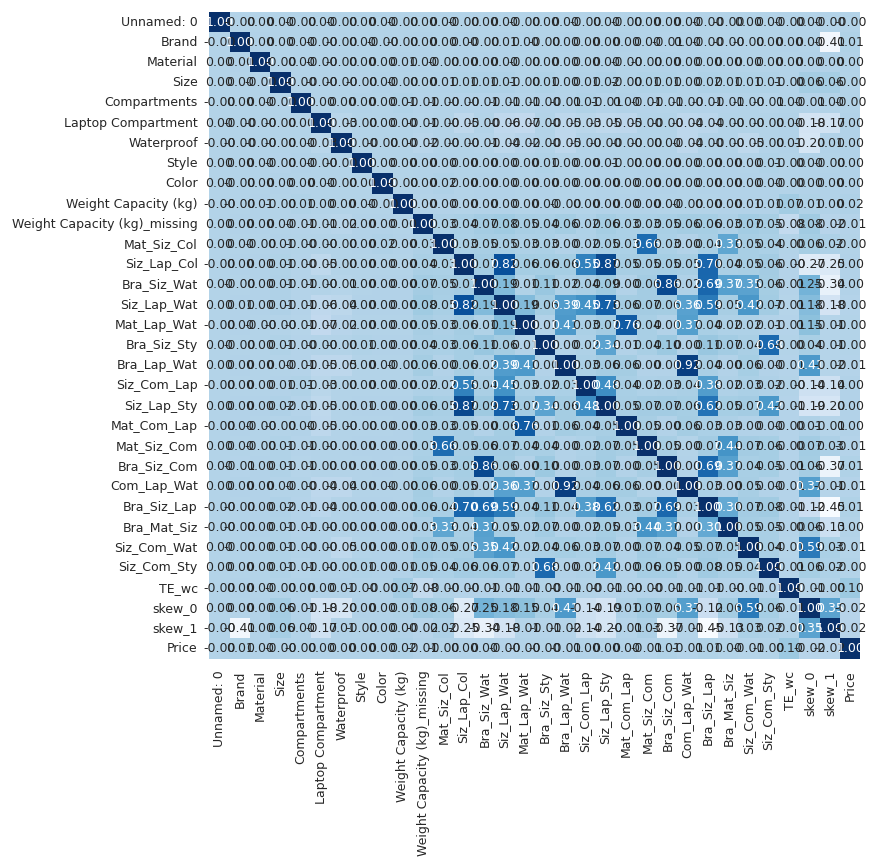


Distribution analysis - Numerical



In [ ]:
eda = EDA()

## 2.0 Data Transformation and Feature Negeneering:

In [ ]:
class Transform(Config, Preprocessing):

    def __init__(self):
        super().__init__()

        if self.missing == 'Y':
            self.missing_values()

        self.train_raw = self.train.copy()

        if self.feature_eng == 'Y':
            self.train = self.new_features(self.train)
            self.test = self.new_features(self.test)
            self.train_raw = self.new_features(self.train_raw)

        self.num_features = self.train.drop(self.target, axis=1).select_dtypes(exclude=['object', 'bool']).columns.tolist()
        self.cat_features = self.train.drop(self.target, axis=1).select_dtypes(include=['object', 'bool']).columns.tolist()

        if self.outliers == 'Y':
            self.remove_outliers()

        if self.log_trf == 'Y':
            self.log_transformation()

        if self.force_normalization == 'Y':
            self.forced_norm_transformation()

        if self.impose_normalization == 'Y':
            self.impose_normalization_transformation()

        if self.trg_enc == 'Y':
            self.target_encoding()

        if self.scaler_trf == 'Y':
            self.scaler()

        if self.outliers == 'Y' or self.log_trf == 'Y' or self.scaler_trf =='Y':
            self.distribution()

    def __call__(self):

        self.train[self.cat_features] = self.train[self.cat_features].astype('category')
        self.test[self.cat_features] = self.test[self.cat_features].astype('category')
        data = pd.concat([self.test, self.train])
        self.train_enc, self.test_enc = self.encode(data)

        self.cat_features_card = []
        for f in self.cat_features:
            self.cat_features_card.append(1 + data[f].max())

        self.y = self.train[self.target]
        self.train = self.train.drop(self.target, axis=1)
        self.train_enc = self.train_enc.drop(self.target, axis=1)

        scaler = StandardScaler()
        self.train_enc[self.num_features] = scaler.fit_transform(self.train_enc[self.num_features])
        self.test_enc[self.num_features] = scaler.transform(self.test_enc[self.num_features])

        return self.train, self.train_enc, self.y, self.test, self.test_enc, self.cat_features

    def encode(self, data):

        oe = OrdinalEncoder()
        data[self.cat_features] = oe.fit_transform(data[self.cat_features]).astype('int')

        train_enc = data[~data[self.target].isna()]
        test_enc = data[data[self.target].isna()].drop(self.target, axis=1)
        return train_enc, test_enc

    def new_features(self, df):
        #Replace Some entries that appears wrong in the dataset:
        df['loan_to_income'] = np.round((df["loan_amnt"] / df["person_income"]),2) - df['loan_percent_income']
        df.loc[df["loan_to_income"] <= -0.15, "loan_amnt"] = (df.loc[df["loan_to_income"] <= -0.15, "person_income"]*df.loc[df["loan_to_income"] <= -0.15, "loan_percent_income"]).values
        df.loc[df["loan_to_income"] >= 0.15, "person_income"] = (df.loc[df["loan_to_income"] >= 0.15, "loan_amnt"]/df.loc[df["loan_to_income"] >= 0.15, "loan_percent_income"]).values
        #df['loan_to_income'] = np.round((df["loan_amnt"] / df["person_income"]),2) - df['loan_percent_income']
        df=df.drop(columns=['loan_to_income'])

        df.loc[df["cb_person_cred_hist_length"]>0.75*df["person_age"],"cb_person_cred_hist_length"] = np.round(df["cb_person_cred_hist_length"].mean(),0).astype(int)

        # New Fearures
        df['interest_to_income'] = df['loan_amnt'] * df['loan_int_rate'] / (df['person_income'])

        df['income_per_year_emp'] = df['person_income'] / (df['person_emp_length']+1.0)
        df['cred_hist_to_age_ratio'] = df['cb_person_cred_hist_length'] / df['person_age']
        # df['int_to_loan_ratio'] = df['loan_int_rate'] / df['loan_amnt']
        df['debt_to_credit_hist_ratio'] = df['loan_amnt'] / df['cb_person_cred_hist_length']
        df['int_to_cred_hist'] = df['loan_int_rate'] / df['cb_person_cred_hist_length']
        df['int_per_year_emp'] = df['loan_int_rate'] / (df['person_emp_length']+1)
        df['loan_amt_per_emp_year'] = df['loan_amnt'] / (df['person_emp_length']+1)
        df['loan_int_emp_interaction'] = df['loan_int_rate'] * (df['person_emp_length']+1)
        df['loan_amt_credit_hist_age_interaction'] = df['loan_amnt'] * df['cb_person_cred_hist_length'] / df['person_age']
        df['age_interaction'] = (df['person_emp_length'] + df['cb_person_cred_hist_length']) / df['person_age']
        df['loan_sustainability'] = (0.01*df['interest_to_income'] + 0.125*df['loan_percent_income'])*(df["loan_grade"].replace({"A":1,"B":2,"C":3,"D":4,"E":5,"F":6,"G":7}))

        df = df[df['person_age']<100]
        df = df[df['person_income']<=1900000]
        df = df[df['person_emp_length']<50]
        df.reset_index(drop=True, inplace=True)

        return df

    def log_transformation(self):

        self.train[self.log_trans_cols] = np.log1p(self.train[self.log_trans_cols])
        self.test[self.log_trans_cols] = np.log1p(self.test[self.log_trans_cols])

        return self

    def forced_norm_transformation(self):

        self.train[self.force_norm_cols] = np.sqrt(self.train[self.force_norm_cols]+0.1)
        self.test[self.force_norm_cols] = np.sqrt(self.test[self.force_norm_cols]+0.1)

        return self

    def impose_normalization_transformation(self):

        scaler = QuantileTransformer(output_distribution='normal',subsample=20_000,random_state=42)
        self.train[self.impose_norm_cols] = scaler.fit_transform(self.train[self.impose_norm_cols])
        self.test[self.impose_norm_cols] = scaler.transform(self.test[self.impose_norm_cols])

        return self


    def distribution(self):

        print(Style.BRIGHT+Fore.RED+f'\nHistograms of distribution\n')
        fig, axes = plt.subplots(nrows=len(self.num_features), ncols=2, figsize=(15, len(self.num_features)*5))

        for (ax_r, ax_n), col in zip(axes, self.num_features):

            ax_r.set_title(f'{col} ($\mu=$ {self.train_raw[col].mean():.2f} and $\sigma=$ {self.train_raw[col].std():.2f} )')
            ax_r.hist(self.train_raw[col], bins=30, color='tomato',alpha=0.7)
            ax_r.axvline(self.train_raw[col].mean(), color='r', label='Mean')
            ax_r.axvline(self.train_raw[col].median(), color='y', linestyle='--', label='Median')
            ax_r.legend()

            ax_n.set_title(f'{col} Normalized ($\mu=$ {self.train[col].mean():.2f} and $\sigma=$ {self.train[col].std():.2f} )')
            ax_n.hist(self.train[col], bins=30, color='royalblue',alpha=0.7)
            ax_n.axvline(self.train[col].mean(), color='r', label='Mean')
            ax_n.axvline(self.train[col].median(), color='y', linestyle='--', label='Median')
            ax_n.legend()

    def remove_outliers(self):
        Q1 = self.train[self.targets].quantile(0.25)
        Q3 = self.train[self.targets].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5*IQR
        upper_limit = Q3 + 1.5*IQR
        self.train = self.train[(self.train[self.targets] >= lower_limit) & (self.train[self.targets] <= upper_limit)]
        self.train.reset_index(drop=True, inplace=True)

    def scaler(self):
        scaler = StandardScaler()
        self.train[self.num_features] = scaler.fit_transform(self.train[self.num_features])
        self.test[self.num_features] = scaler.transform(self.test[self.num_features])
        return self

    def missing_values(self):

        self.train[self.num_features] = self.train[self.num_features].fillna(self.train[self.num_features].median())
        self.test[self.num_features] = self.test[self.num_features].fillna(self.test[self.num_features].median())
        for column in self.cat_features:
            self.train[column] = self.train[column].fillna(self.train[column].mode()[0])
            self.test[column] = self.test[column].fillna(self.test[column].mode()[0])
        return self

    def target_encoding(self):
        te = TargetEncoder()
        self.train[self.trg_enc_feat] = te.fit_transform(self.train[self.trg_enc_feat],self.train[self.target])
        self.test[self.trg_enc_feat] = te.transform(self.test[self.trg_enc_feat])

        for a in self.cat_features:
            self.cat_features.remove(a)

        return self

    @property
    def cat_features(self):
        return self._cat_features

    @cat_features.setter
    def cat_features(self, cat_features):
        self._cat_features = cat_features

    @property
    def num_features(self):
        return self._num_features

    @num_features.setter
    def num_features(self, num_features):
        self._num_features = num_features

    @property
    def cat_features_card(self):
        return self._cat_features_card

    @cat_features_card.setter
    def cat_features_card(self, cat_features_card):
        self._cat_features_card = cat_features_card

    @property
    def train(self):
        return self._train

    @train.setter
    def train(self, train):
        self._train = train

    @property
    def direction(self):
        return self._direction

    @direction.setter
    def direction(self, direction):
        self._direction= direction


class MixedDataImputer:
    """
    Imputes missing values in mixed-data train and test DataFrames using
    separate IterativeImputers for numerical and categorical features.

    Args:
      train_df: Pandas DataFrame with training data.
      test_df: Pandas DataFrame with test data.
      target_feature: Name of the target feature column.
      random_state: Random state for reproducibility (default=42).
    """

    def __init__(self, train_df, test_df, target_feature=None, random_state=42):
        super().__init__()
        self.train_df = train_df
        self.test_df = test_df
        self.target_feature = target_feature
        self.random_state = random_state
        self.num_features = None
        self.cat_features = None

    def _identify_features(self):
        """Identifies numerical and categorical features."""
        self.num_features = self.train_df.select_dtypes(include=['number']).columns.tolist()
        self.cat_features = self.train_df.select_dtypes(exclude=['number']).columns.tolist()
        #self.num_features.remove(self.target_feature)  # Remove target from numerical features

    def _impute_data(self, df):
        """Imputes missing values in a DataFrame."""
        df_num = df[self.num_features].copy()
        df_cat = df[self.cat_features].copy()

        # Impute numerical features only if there are missing values
        if df_num.isnull().values.any():
            num_imputer = IterativeImputer(estimator=BayesianRidge(),
                                          random_state=self.random_state)
            df_num_imputed = pd.DataFrame(num_imputer.fit_transform(df_num),
                                         columns=self.num_features)
        else:
            df_num_imputed = df_num  # No imputation needed

        # Impute categorical features only if there are missing values
        if df_cat.isnull().values.any():
            cat_imputer = IterativeImputer(estimator=LogisticRegression(),
                                          initial_strategy='most_frequent',
                                          random_state=self.random_state)
            df_cat_imputed = pd.DataFrame(cat_imputer.fit_transform(df_cat),
                                         columns=self.cat_features)

            # Convert categorical features back to their original datatype
            for feature in self.cat_features:
                df_cat_imputed[feature] = df_cat_imputed[feature].astype(df[feature].dtype)
        else:
            df_cat_imputed = df_cat  # No imputation needed

        # Concatenate the imputed DataFrames
        df_imputed = pd.concat([df_num_imputed, df_cat_imputed], axis=1)

        return df_imputed

    def transform(self):
        """
        Imputes missing values in both train and test DataFrames.

        Returns:
          train_df_imputed: Pandas DataFrame with imputed training data.
          test_df_imputed: Pandas DataFrame with imputed test data.
        """
        self._identify_features()
        train_df_imputed = self._impute_data(self.train_df)
        test_df_imputed = self._impute_data(self.test_df)
        return train_df_imputed, test_df_imputed


Histograms of distribution



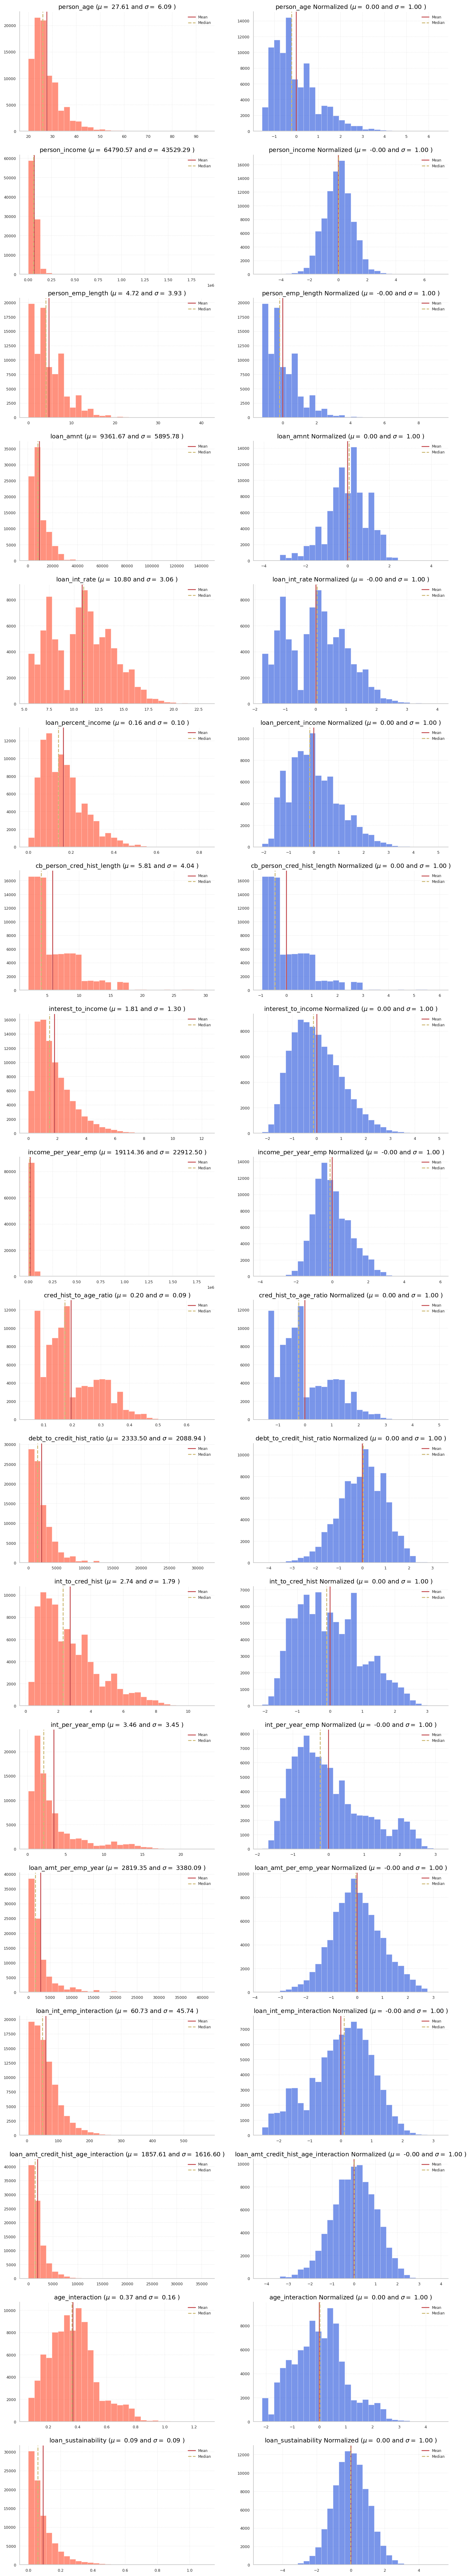

In [ ]:
t = Transform()
X, X_enc, y, test, test_enc, cat_features = t()

In [ ]:
t.cat_features, t.cat_features_card, t.train.shape, t.direction_

(['person_home_ownership',
  'loan_intent',
  'loan_grade',
  'cb_person_default_on_file'],
 [4, 6, 7, 2],
 (91050, 22),
 'maximize')

In [ ]:
X.shape, X_enc.shape, test.shape, test_enc.shape

((91050, 22), (91050, 22), (39098, 22), (39098, 22))

In [ ]:
X_enc.isna().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0
cb_person_default_on_file,0


In [ ]:
imputer = MixedDataImputer(X_enc, test_enc)

In [ ]:
train_df_imputed, test_df_imputed = imputer.transform()

In [ ]:
train_df_imputed.isna().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0
cb_person_default_on_file,0


## 3.0 Advanced Feature Engeneering

In [ ]:
X_enc.sample(3)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,interest_to_income,income_per_year_emp,cred_hist_to_age_ratio,debt_to_credit_hist_ratio,int_to_cred_hist,int_per_year_emp,loan_amt_per_emp_year,loan_int_emp_interaction,loan_amt_credit_hist_age_interaction,age_interaction,loan_sustainability
25443,0.353132,-0.422039,0,1.343684,4,1,-0.363579,-0.047856,-0.276580,0,1.037050,-0.199848,-1.350989,1.580800,-1.103211,-1.019459,-0.986900,-1.188534,1.181213,0.521194,1.895025,0.008473
35356,-0.408448,0.110867,0,0.071269,5,0,-1.128354,-1.271609,-1.149017,0,-0.448775,-1.339243,-0.305901,-0.381790,-0.652495,-0.489844,-0.841367,-1.090918,-0.127986,-1.004953,-0.001252,-1.628590
5476,0.527639,-0.254805,3,2.361616,4,0,-0.636548,-0.607379,-0.631434,0,0.294138,-0.705733,-1.622796,0.396899,-0.909430,-0.836443,-1.329144,-1.692611,1.352713,-0.162794,1.948354,-0.991449


In [ ]:
X_enc_y = pd.concat([X_enc, y], axis=1)
X_enc_y.sample(3)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,interest_to_income,income_per_year_emp,cred_hist_to_age_ratio,debt_to_credit_hist_ratio,int_to_cred_hist,int_per_year_emp,loan_amt_per_emp_year,loan_int_emp_interaction,loan_amt_credit_hist_age_interaction,age_interaction,loan_sustainability,loan_status
43594,0.172709,-0.702351,0,1.852650,3,1,-0.970622,-0.289989,-0.631434,0,0.789413,-0.598092,-1.718730,1.332338,-1.436616,-0.987195,-1.167298,-1.774478,1.301811,-0.046808,2.201618,-0.259097,0
14961,-0.207594,1.752121,0,1.343684,5,1,0.401264,-0.299805,-1.014061,0,-0.448775,-0.904846,-0.051546,-0.447135,0.483938,-0.001486,-1.046028,-0.665188,1.086051,0.167448,1.076005,-0.577784,0
18086,-0.207594,-0.215088,0,1.343684,5,1,1.033133,-0.263812,1.312080,0,-0.448775,1.016124,-1.227309,-0.447135,0.953517,0.015140,-1.037449,-0.232619,1.100086,0.671332,1.076005,0.782179,0


In [ ]:
X_enc_y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91050 entries, 0 to 91049
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   person_age                            91050 non-null  float64
 1   person_income                         91050 non-null  float64
 2   person_home_ownership                 91050 non-null  int64  
 3   person_emp_length                     91050 non-null  float64
 4   loan_intent                           91050 non-null  int64  
 5   loan_grade                            91050 non-null  int64  
 6   loan_amnt                             91050 non-null  float64
 7   loan_int_rate                         91050 non-null  float64
 8   loan_percent_income                   91050 non-null  float64
 9   cb_person_default_on_file             91050 non-null  int64  
 10  cb_person_cred_hist_length            91050 non-null  float64
 11  interest_to_income  

In [ ]:
class plot_class():

    def __init__(self,df, target_variable, features_cat,features_num):
      self.df = df
      self.target_variable = target_variable
      self.features_cat = features_cat
      self.features_num = features_num

    @classmethod
    def plot_categorical_features(cls, df, target_variable, features_cat, features_num):
        """
        Plots the frequency of the target variable for each value of multiple categorical features.

        Args:
          df: Pandas DataFrame containing the data.
          target_variable: Name of the target variable column in the DataFrame.
          features: List of names of the categorical feature columns to plot.
        """

        num_features = len(features_cat)
        num_rows = (num_features + 1) // 2  # Calculate the number of rows needed

        fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))
        axes = axes.flatten()  # Flatten the axes array for easier iteration

        for i, feature in enumerate(features_cat):
            cross_tab = pd.crosstab(df[feature], df[target_variable])
            cross_tab.plot(kind='bar', stacked=False, position=0.3, width=0.4, ax=axes[i],colormap=palette_1, alpha=0.6)
            axes[i].set_xlabel(feature)
            axes[i].set_ylabel('Frequency')
            axes[i].set_title(f'Frequency of {target_variable} by {feature}')

        # Hide any unused subplots
        for i in range(num_features, len(axes)):
            axes[i].axis('off')

        plt.tight_layout()
        plt.show()

        return cls(df, target_variable, features_cat, features_num)

    @classmethod
    def plot_numerical_features(cls, df, target_variable, features_cat, features_num):
        """
        Generates violin plots for numerical features, showing the distribution for each target class.

        Args:
          df: Pandas DataFrame containing the data.
          target_variable: Name of the target variable column in the DataFrame.
          features: List of names of the numerical feature columns to plot.
        """

        num_features = len(features_num)
        num_rows = (num_features + 1) // 2  # Calculate the number of rows needed

        fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))
        axes = axes.flatten()  # Flatten the axes array for easier iteration

        for i, feature in enumerate(features_num):
            sns.violinplot(x=target_variable, y=feature, data=df, ax=axes[i],
                           hue=target_variable,  # Use 'hue' to color by target class
                           palette=palette_9)
            axes[i].set_xlabel(target_variable)
            axes[i].set_ylabel(feature)
            axes[i].set_title(f'Distribution of {feature} by {target_variable}')

        # Hide any unused subplots
        for i in range(num_features, len(axes)):
            axes[i].axis('off')

        plt.tight_layout()
        plt.show()

        return cls(df, target_variable, features_cat, features_num)

    def scatter_comp(self, feat_01, feat_02, hue_def):
        """
        Generates a scatter plot between two features, colored by a third
        categorical feature using Seaborn.

        Args:
          df: Pandas DataFrame containing the data.
          x_feature: Name of the feature to plot on the x-axis.
          y_feature: Name of the feature to plot on the y-axis.
          color_feature: Name of the categorical feature to use for coloring.
        """
        fig, ax = plt.subplots(figsize=(8, 6))
        sns.scatterplot(
            x=feat_01,
            y=feat_02,
            hue=hue_def,  # Use 'hue' for color encoding
            data=self.df,
            ax=ax
        )

        plt.xlabel(feat_01)
        plt.ylabel(feat_02)
        plt.title(f'ScatterPlot of {feat_01} vs. {feat_02} colored by {hue_def}')
        plt.show()

    def heatmap_corr(self):
        print(Style.BRIGHT+Fore.RED+f'\nCorrelation Heatmap\n')
        plt.figure(figsize=(7,7))
        corr = self.df.select_dtypes(exclude='int').corr(method='pearson')
        sns.heatmap(corr, fmt = '0.2f', cmap = "Reds", annot=True, cbar=False)
        plt.show()

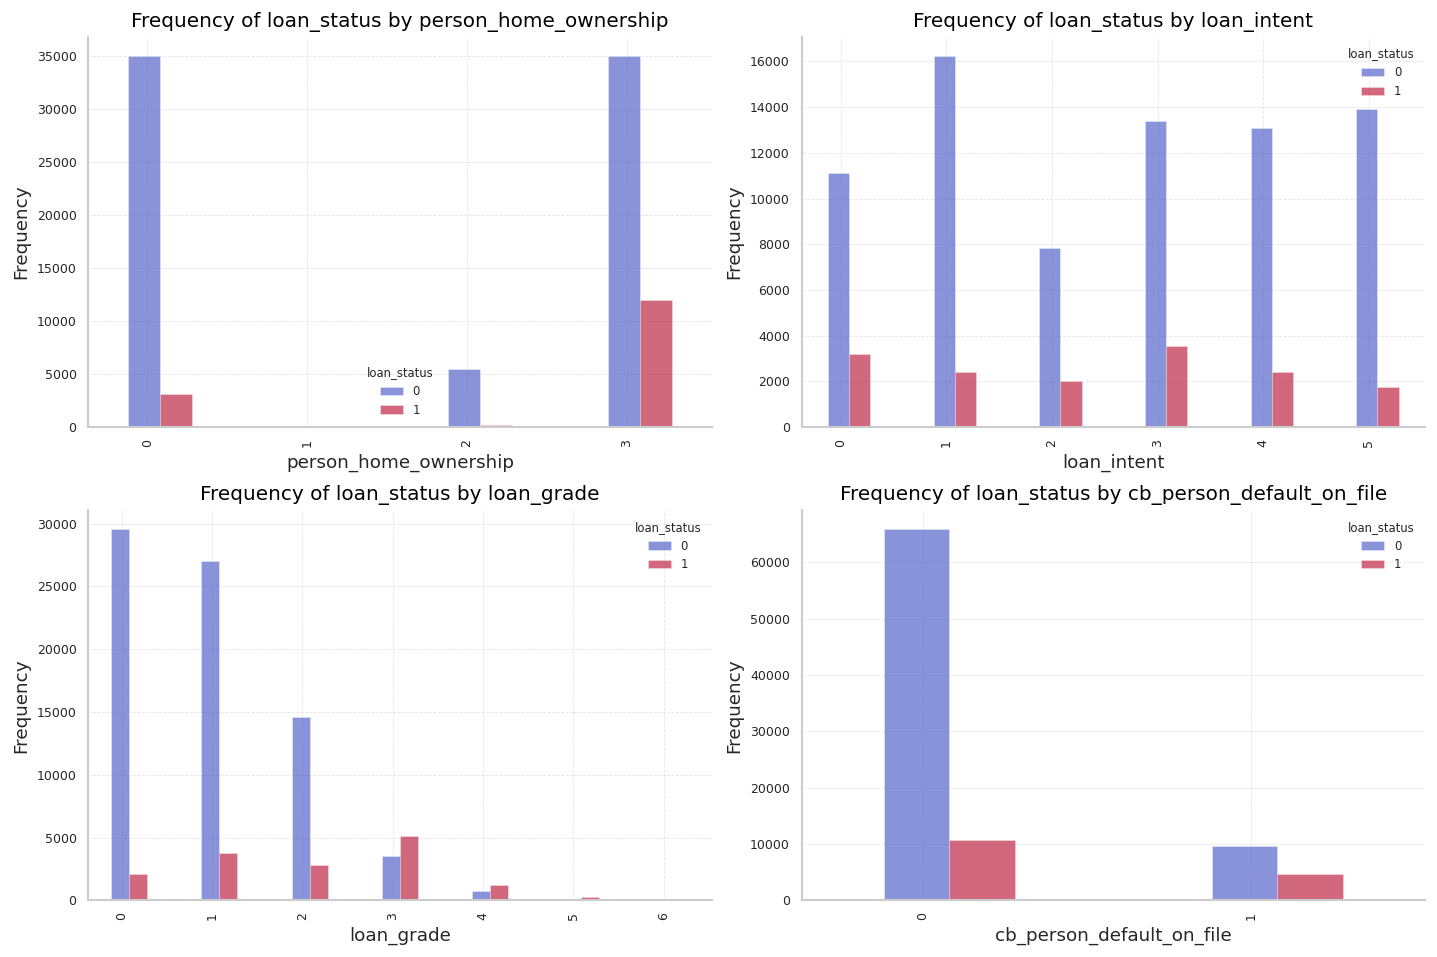

In [ ]:
plot_instance = plot_class.plot_categorical_features(df=X_enc_y, target_variable="loan_status", features_cat=t.cat_features, features_num=t.num_features);

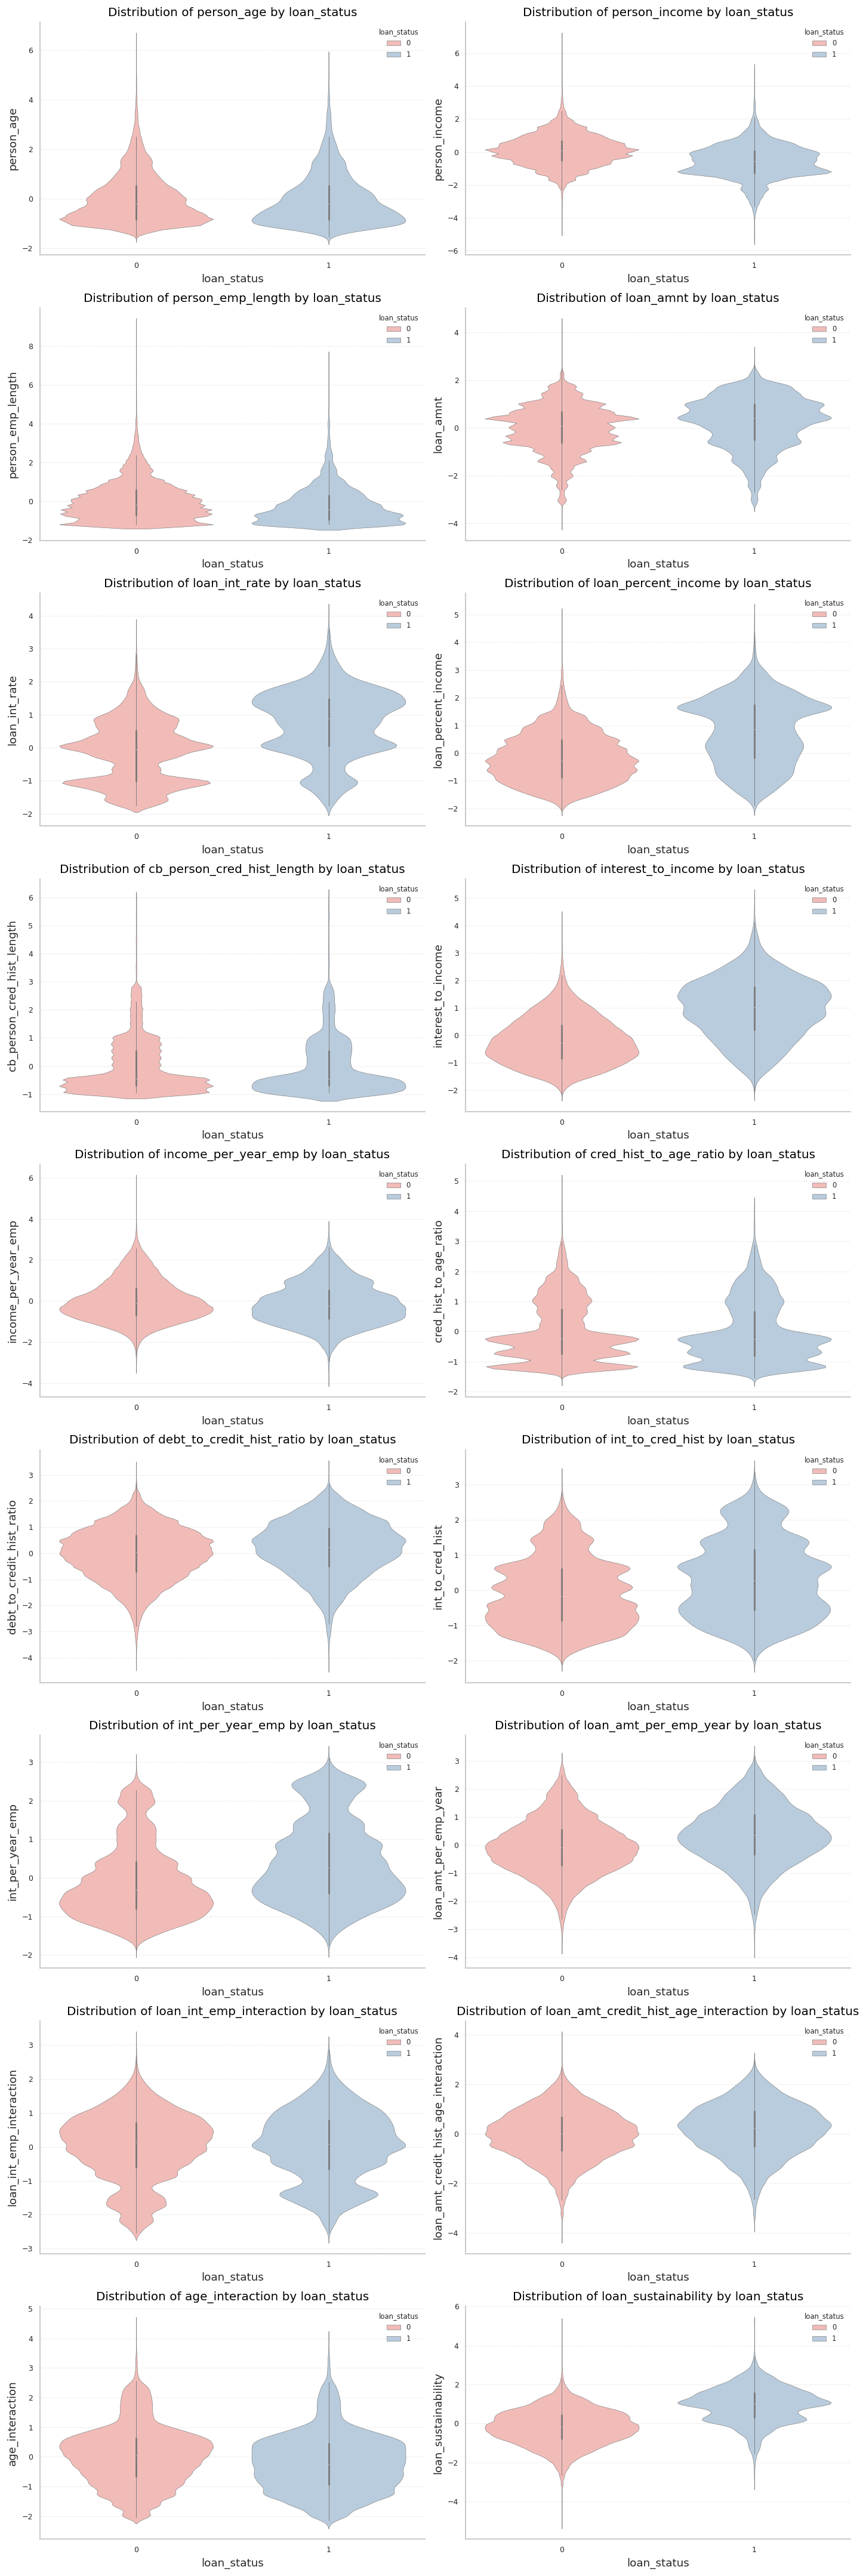

In [ ]:
plot_instance.plot_numerical_features(df=X_enc_y, target_variable="loan_status", features_cat=t.cat_features, features_num=t.num_features);

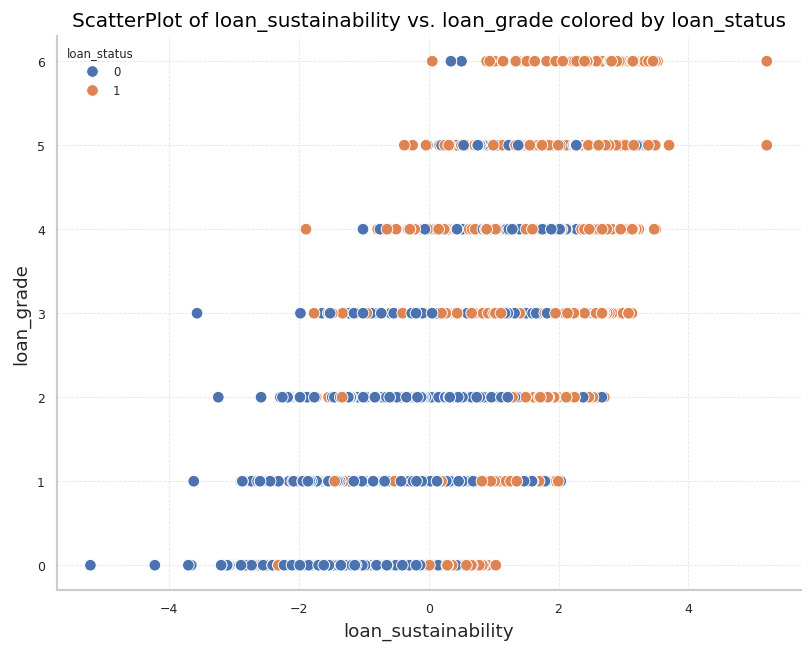

In [ ]:
plot_instance.scatter_comp(feat_01="loan_sustainability", feat_02="loan_grade", hue_def="loan_status")


Correlation Heatmap



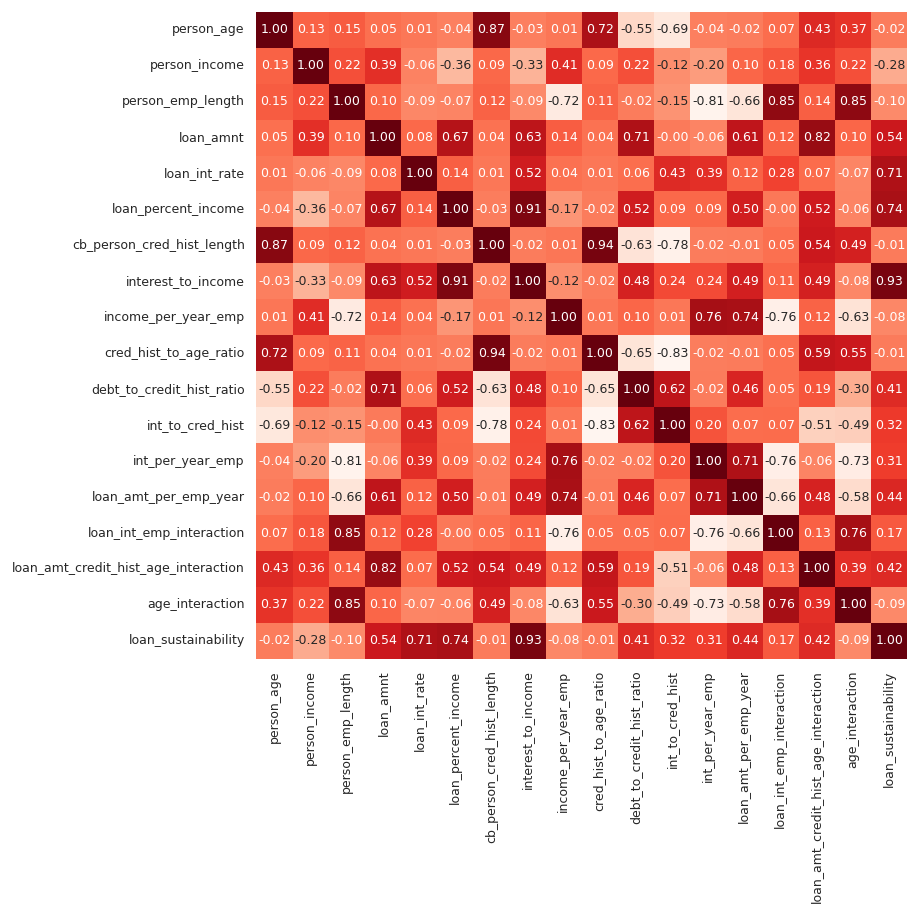

In [ ]:
plot_instance.heatmap_corr()

## **4.0 MODELS**

--------------------

### **4.1 TREE BASED MODELS**

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weights = dict(enumerate(class_weights))

sample_pos_weight = class_weights[1]/class_weights[0]
sample_pos_weight

4.898166742242664

#### 4.1.1 CatBoostClassifier:

    class CatBoostClassifier(iterations=None,
                            learning_rate=None,
                            depth=None,
                            l2_leaf_reg=None,
                            model_size_reg=None,
                            rsm=None,
                            loss_function=None,
                            border_count=None,
                            feature_border_type=None,
                            per_float_feature_quantization=None,
                            input_borders=None,
                            output_borders=None,
                            fold_permutation_block=None,
                            od_pval=None,
                            od_wait=None,
                            od_type=None,
                            nan_mode=None,
                            counter_calc_method=None,
                            leaf_estimation_iterations=None,
                            leaf_estimation_method=None,
                            thread_count=None,
                            random_seed=None,
                            use_best_model=None,
                            verbose=None,
                            logging_level=None,
                            metric_period=None,
                            ctr_leaf_count_limit=None,
                            store_all_simple_ctr=None,
                            max_ctr_complexity=None,
                            has_time=None,
                            allow_const_label=None,
                            classes_count=None,
                            class_weights=None,
                            auto_class_weights=None,
                            one_hot_max_size=None,
                            random_strength=None,
                            name=None,
                            ignored_features=None,
                            train_dir=None,
                            custom_loss=None,
                            custom_metric=None,
                            eval_metric=None,
                            bagging_temperature=None,
                            save_snapshot=None,
                            snapshot_file=None,
                            snapshot_interval=None,
                            fold_len_multiplier=None,
                            used_ram_limit=None,
                            gpu_ram_part=None,
                            allow_writing_files=None,
                            final_ctr_computation_mode=None,
                            approx_on_full_history=None,
                            boosting_type=None,
                            simple_ctr=None,
                            combinations_ctr=None,
                            per_feature_ctr=None,
                            task_type=None,
                            device_config=None,
                            devices=None,
                            bootstrap_type=None,
                            subsample=None,
                            sampling_unit=None,
                            dev_score_calc_obj_block_size=None,
                            max_depth=None,
                            n_estimators=None,
                            num_boost_round=None,
                            num_trees=None,
                            colsample_bylevel=None,
                            random_state=None,
                            reg_lambda=None,
                            objective=None,
                            eta=None,
                            max_bin=None,
                            scale_pos_weight=None,
                            gpu_cat_features_storage=None,
                            data_partition=None
                            metadata=None,
                            early_stopping_rounds=None,
                            cat_features=None,
                            grow_policy=None,
                            min_data_in_leaf=None,
                            min_child_samples=None,
                            max_leaves=None,
                            num_leaves=None,
                            score_function=None,
                            leaf_estimation_backtracking=None,
                            ctr_history_unit=None,
                            monotone_constraints=None,
                            feature_weights=None,
                            penalties_coefficient=None,
                            first_feature_use_penalties=None,
                            model_shrink_rate=None,
                            model_shrink_mode=None,
                            langevin=None,
                            diffusion_temperature=None,
                            posterior_sampling=None,
                            boost_from_average=None,
                            text_features=None,
                            tokenizers=None,
                            dictionaries=None,
                            feature_calcers=None,
                            text_processing=None,
                            fixed_binary_splits=None)


In [ ]:
cat_prob = {"objective":"Logloss","eval_metric":"AUC"}

##### 4.1.2 Optuna Optimization:

In [ ]:
def objective_catboost(trial, X, y, n_splits, n_repeats, model=CatBoostClassifier, use_gpu=True, rs=42, fit_scaling=False, cv_strategy="KFold", metrics=cat_prob):

    model_class = model

    categorical_features = t.cat_features.copy()

    num_cols = [col for col in X.columns if col not in categorical_features]

    params = {
        'iterations': 2501,
        'learning_rate': 0.025, #trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'depth': trial.suggest_int('depth', 7, 11),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-4, 0.1, log=True),
        "bootstrap_type": "Bernoulli",
        'subsample': trial.suggest_float('subsample', 0.75, 0.95,step=0.025),
        'random_strength': trial.suggest_float('random_strength', 0.0, 1.0),
        #'border_count': trial.suggest_int('border_count', 32, 255),
        'cat_features': categorical_features,
        'task_type': 'GPU' if use_gpu else 'CPU',
        'random_seed':rs,
        'verbose': 100,
        'objective': metrics["objective"],
        'eval_metric': metrics["eval_metric"],
        "od_type":'EBS', #Early stopping hyperparmeter
        "od_wait":101,
        "scale_pos_weight":sample_pos_weight,
        "sampling_frequency":"PerTreeLevel",
        "use_best_model":True,
    }

    if cv_strategy == 'RepKFold':
      kf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=rs)
    elif cv_strategy == 'KFold':
      kf = KFold(n_splits=n_splits, random_state=rs, shuffle=True)
    elif cv_strategy == "StratKFold":
      kf = StratifiedKFold(n_splits=n_splits, random_state=rs, shuffle=True)
    elif cv_strategy == "RepStratKFold":
      kf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=rs)

    auc_scores = []

    for idx_train, idx_valid in kf.split(X, y):

        # Split the data into training and validation sets for the current fold
        X_train, y_train = X.iloc[idx_train], y.iloc[idx_train].to_numpy().reshape(-1,1)
        X_valid, y_valid = X.iloc[idx_valid], y.iloc[idx_valid].to_numpy().reshape(-1,1)

        if fit_scaling:
          scaler = StandardScaler()
          X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
          X_valid[num_cols] = scaler.transform(X_valid[num_cols])

        # Create the Pool objects for CatBoost
        train_pool = Pool(data=X_train, label=y_train, cat_features=categorical_features)
        valid_pool = Pool(data=X_valid, label=y_valid, cat_features=categorical_features)

        # Create the pipeline
        model = model_class(**params)
        # Fit the model:
        model.fit(train_pool, eval_set=valid_pool, early_stopping_rounds=101,
                  #callbacks=[optuna.integration.CatBoostPruningCallback(trial, "RMSE")]
                  )

        # Make predictions on the validation set
        y_pred = model.predict_proba(X_valid)[:, 1]

#        y_pred = np.expm1(y_pred)
#        y_valid = np.expm1(y_valid)

        # Calculate the RMSE for the current fold

        auc_score = roc_auc_score(y_valid, y_pred)
        auc_scores.append(auc_score)

    # Calculate the mean RMSLE score across all folds
    key_metric = np.mean(auc_scores)

    return key_metric

In [ ]:
# Step 2: Tuning Hyperparameters with Optuna
def tune_hyperparameters(X, y, model_class, n_trials, n_splits_ ,n_repeats_, use_gpu=True):  #use_gpu
    study = optuna.create_study(direction=t.direction_, sampler=optuna.samplers.TPESampler(), pruner=optuna.pruners.MedianPruner(n_warmup_steps=50))
    study.optimize(lambda trial: objective_catboost(trial, X, y, n_splits=n_splits_, n_repeats=n_repeats_, model=model_class, use_gpu=use_gpu, cv_strategy="StratKFold"), n_trials=n_trials)
    return study  # Return the study object

# Step 3: Saving Best Results and Models
def save_results(study, model_class, model_name):
    best_params_file = f"{model_name}_best_params.joblib"
    joblib.dump(study.best_params, best_params_file)
    print(f"Best parameters for {model_name} saved to {best_params_file}")

    verbose_file = f"{model_name}_optuna_verbose.log"
    with open(verbose_file, "w") as f:
        f.write(str(study.trials))
    print(f"Optuna verbose for {model_name} saved to {verbose_file}")

In [ ]:
# usage with XGBRegressor
cat_study = tune_hyperparameters(X_enc, y, model_class=CatBoostClassifier, n_trials=31, n_splits_ = 3 ,n_repeats_=3, use_gpu=False)
save_results(cat_study, CatBoostClassifier, "CatBoost_ext")
cat_params = cat_study.best_params

#### **4.2.1 LGBMClassifier**

In [ ]:
import lightgbm as lgb
lgbm_prob = {"objective":"binary","eval_metric":"auc"}

##### 4.2.2 Optuna Optimization:

In [ ]:
X_enc.info()
t.cat_features

<class 'pandas.core.frame.DataFrame'>
Index: 91050 entries, 0 to 91049
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   person_age                            91050 non-null  float64
 1   person_income                         91050 non-null  float64
 2   person_home_ownership                 91050 non-null  int64  
 3   person_emp_length                     91050 non-null  float64
 4   loan_intent                           91050 non-null  int64  
 5   loan_grade                            91050 non-null  int64  
 6   loan_amnt                             91050 non-null  float64
 7   loan_int_rate                         91050 non-null  float64
 8   loan_percent_income                   91050 non-null  float64
 9   cb_person_default_on_file             91050 non-null  int64  
 10  cb_person_cred_hist_length            91050 non-null  float64
 11  interest_to_income  

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [ ]:
def objective_lgbm(trial, X, y, n_splits, n_repeats, model=LGBMClassifier, use_gpu=True, rs=42, fit_scaling=False, cv_strategy="KFold", metrics=lgbm_prob):

    model_class = model

    categorical_features = t.cat_features.copy()

    num_cols = [col for col in X.columns if col not in categorical_features]

    params = {
        'num_leaves': trial.suggest_int('num_leaves', 20, 200),
        'learning_rate': 0.02, #trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'min_child_samples': trial.suggest_int('min_child_samples', 20, 50),
        'subsample': trial.suggest_float('subsample', 0.5, 0.95),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 0.95),
        "reg_alpha" :         trial.suggest_float("reg_alpha", 1e-3, 1.0, log=True),
        "reg_lambda" :        trial.suggest_float("reg_lambda", 1e-3, 1.0, log=True),
        "boosting_type":      'gbdt',
        'n_estimators': 2501,
        'objective': metrics["objective"],
        'metric': metrics["eval_metric"],
        'device': 'gpu' if use_gpu else 'cpu',
        'verbose': -1,
        'scale_pos_weight': sample_pos_weight,
        'cat_features': categorical_features,
#       'categorical_feature': [2,4,5,9],
        'random_state': rs,
    }

    if cv_strategy == 'RepKFold':
        kf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=rs)
    elif cv_strategy == 'KFold':
        kf = KFold(n_splits=n_splits, random_state=rs, shuffle=True)
    elif cv_strategy == "StratKFold":
        kf = StratifiedKFold(n_splits=n_splits, random_state=rs, shuffle=True)
    elif cv_strategy == "RepStratKFold":
        kf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=rs)

    auc_scores = []

    for idx_train, idx_valid in kf.split(X, y):

        # Split the data into training and validation sets for the current fold
        X_train, y_train = X.iloc[idx_train], y.iloc[idx_train].to_numpy().reshape(-1, 1)
        X_valid, y_valid = X.iloc[idx_valid], y.iloc[idx_valid].to_numpy().reshape(-1, 1)

        if fit_scaling:
            scaler = StandardScaler()
            X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
            X_valid[num_cols] = scaler.transform(X_valid[num_cols])

        # Create the datasets for LightGBM
        # d_train = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_features)
        # d_valid = lgb.Dataset(X_valid, label=y_valid, categorical_feature=categorical_features)

        # Create the model
        model = model_class(**params)

        # Create the early stopping callback
        early_stop = early_stopping(stopping_rounds=101)

        # Fit the model
        model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], callbacks=[early_stop])

        # Make predictions on the validation set
        y_pred = model.predict_proba(X_valid)[:, 1]

        # Calculate the AUC for the current fold
        auc_score = roc_auc_score(y_valid, y_pred)
        auc_scores.append(auc_score)

    # Calculate the mean auc score across all folds
    key_metric = np.mean(auc_scores)

    return key_metric

In [ ]:
# Step 2: Tuning Hyperparameters with Optuna
def tune_hyperparameters(X, y, model_class, n_trials, n_splits_ ,n_repeats_, use_gpu=True):  #use_gpu
    study = optuna.create_study(direction=t.direction_, sampler=optuna.samplers.TPESampler(), pruner=optuna.pruners.MedianPruner(n_warmup_steps=50))
    study.optimize(lambda trial: objective_lgbm(trial, X, y, n_splits=n_splits_, n_repeats=n_repeats_, model=model_class, use_gpu=use_gpu, cv_strategy="StratKFold"), n_trials=n_trials)
    return study  # Return the study object

# Step 3: Saving Best Results and Models
def save_results(study, model_class, model_name):
    best_params_file = f"{model_name}_best_params.joblib"
    joblib.dump(study.best_params, best_params_file)
    print(f"Best parameters for {model_name} saved to {best_params_file}")

    verbose_file = f"{model_name}_optuna_verbose.log"
    with open(verbose_file, "w") as f:
        f.write(str(study.trials))
    print(f"Optuna verbose for {model_name} saved to {verbose_file}")# usage with XGBRegressor

In [ ]:
cat_study = tune_hyperparameters(X_enc, y, model_class=LGBMClassifier, n_trials=31, n_splits_ = 3 ,n_repeats_=3, use_gpu=False)
save_results(cat_study, LGBMClassifier, "LGBMBoost_ext")
cat_params = cat_study.best_params

[I 2025-01-27 02:17:27,339] A new study created in memory with name: no-name-a2944de6-78b6-4a86-b392-60efbe19e234


Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1519]	valid_0's auc: 0.95728
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1539]	valid_0's auc: 0.954976
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1463]	valid_0's auc: 0.954618


[I 2025-01-27 02:18:43,522] Trial 0 finished with value: 0.9556248466191858 and parameters: {'num_leaves': 21, 'max_depth': 8, 'min_child_samples': 21, 'subsample': 0.8023969026696861, 'colsample_bytree': 0.7792270262616117, 'reg_alpha': 0.04164196219921136, 'reg_lambda': 0.20976714272909777}. Best is trial 0 with value: 0.9556248466191858.


Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1822]	valid_0's auc: 0.956098
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1974]	valid_0's auc: 0.954434
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[2178]	valid_0's auc: 0.954115


[I 2025-01-27 02:20:23,262] Trial 1 finished with value: 0.9548823840257201 and parameters: {'num_leaves': 50, 'max_depth': 5, 'min_child_samples': 38, 'subsample': 0.6238770624850111, 'colsample_bytree': 0.7170922656821805, 'reg_alpha': 0.0223283594057821, 'reg_lambda': 0.006411076449661441}. Best is trial 0 with value: 0.9556248466191858.


Training until validation scores don't improve for 101 rounds
Did not meet early stopping. Best iteration is:
[2473]	valid_0's auc: 0.952913
Training until validation scores don't improve for 101 rounds
Did not meet early stopping. Best iteration is:
[2500]	valid_0's auc: 0.950634
Training until validation scores don't improve for 101 rounds
Did not meet early stopping. Best iteration is:
[2498]	valid_0's auc: 0.949942


[I 2025-01-27 02:22:17,810] Trial 2 finished with value: 0.9511633316315259 and parameters: {'num_leaves': 124, 'max_depth': 3, 'min_child_samples': 44, 'subsample': 0.5122737585243717, 'colsample_bytree': 0.893579143542804, 'reg_alpha': 0.2810351190025177, 'reg_lambda': 0.06652391461497906}. Best is trial 0 with value: 0.9556248466191858.


Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1056]	valid_0's auc: 0.956959
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1205]	valid_0's auc: 0.955149
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1109]	valid_0's auc: 0.955385


[I 2025-01-27 02:23:43,779] Trial 3 finished with value: 0.9558310884760123 and parameters: {'num_leaves': 51, 'max_depth': 12, 'min_child_samples': 27, 'subsample': 0.940984763302164, 'colsample_bytree': 0.6670623485257026, 'reg_alpha': 0.01283056227775225, 'reg_lambda': 0.05576497398391403}. Best is trial 3 with value: 0.9558310884760123.


Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1382]	valid_0's auc: 0.957413
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1411]	valid_0's auc: 0.955469
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1433]	valid_0's auc: 0.955279


[I 2025-01-27 02:25:27,275] Trial 4 finished with value: 0.9560534766673077 and parameters: {'num_leaves': 83, 'max_depth': 6, 'min_child_samples': 40, 'subsample': 0.7854826152462991, 'colsample_bytree': 0.5686430535443056, 'reg_alpha': 0.5462674737980667, 'reg_lambda': 0.07722749597583858}. Best is trial 4 with value: 0.9560534766673077.


Training until validation scores don't improve for 101 rounds
Did not meet early stopping. Best iteration is:
[2501]	valid_0's auc: 0.953228
Training until validation scores don't improve for 101 rounds
Did not meet early stopping. Best iteration is:
[2501]	valid_0's auc: 0.950584
Training until validation scores don't improve for 101 rounds
Did not meet early stopping. Best iteration is:
[2499]	valid_0's auc: 0.949989


[I 2025-01-27 02:27:35,957] Trial 5 finished with value: 0.9512668843822482 and parameters: {'num_leaves': 80, 'max_depth': 3, 'min_child_samples': 45, 'subsample': 0.7727054351970579, 'colsample_bytree': 0.8963977999839141, 'reg_alpha': 0.9661909437455208, 'reg_lambda': 0.027938763690487974}. Best is trial 4 with value: 0.9560534766673077.


Training until validation scores don't improve for 101 rounds


[W 2025-01-27 02:27:57,070] Trial 6 failed with parameters: {'num_leaves': 177, 'max_depth': 11, 'min_child_samples': 44, 'subsample': 0.795509645388436, 'colsample_bytree': 0.5997121063047424, 'reg_alpha': 0.07643045693438236, 'reg_lambda': 0.08677891514854197} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-67-6eb2fecaf356>", line 4, in <lambda>
    study.optimize(lambda trial: objective_lgbm(trial, X, y, n_splits=n_splits_, n_repeats=n_repeats_, model=model_class, use_gpu=use_gpu, cv_strategy="StratKFold"), n_trials=n_trials)
  File "<ipython-input-66-3c3eef0b1231>", line 63, in objective_lgbm
    model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], callbacks=[early_stop])
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py", line 1284, in fit
    super().fit(
  File 

KeyboardInterrupt: 

#### **4.3.1 XGBClassifier**

In [ ]:
import xgboost as xgb
xgb_prob = {'objective': 'binary:logistic','eval_metric': "auc"}

##### 4.2.2 Optuna Optimization:

In [ ]:
def objective_xgb(trial, X, y, n_splits, n_repeats, model=XGBClassifier, use_gpu=True, rs=42, fit_scaling=False, cv_strategy="KFold", metrics=xgb_prob):

    model_class = model

    categorical_features = t.cat_features.copy()

    num_cols = [col for col in X.columns if col not in categorical_features]

    params = {
              'n_estimators': 1000,
              'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
              'max_depth': trial.suggest_int('max_depth', 3, 10),
              'max_bin': trial.suggest_int('max_bin', 255, 511),
              'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
              'subsample': trial.suggest_float('subsample', 0.7, 0.95),
              'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 0.95),
              'gamma': trial.suggest_float('gamma', 0, 1),
              'reg_alpha': trial.suggest_float('reg_alpha', 0, 1),
              'reg_lambda': trial.suggest_float('reg_lambda', 0, 1),
              'objective':  metrics["objective"],  # For binary classification
              'eval_metric': metrics["eval_metric"],
              "early_stopping_rounds":101,
              'tree_method': 'gpu_hist' if use_gpu else 'hist',  # Use GPU if available
              'random_state': rs,
              'enable_categorical': True,
              'scale_pos_weight': sample_pos_weight,
             }

    if cv_strategy == 'RepKFold':
        kf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=rs)
    elif cv_strategy == 'KFold':
        kf = KFold(n_splits=n_splits, random_state=rs, shuffle=True)
    elif cv_strategy == "StratKFold":
        kf = StratifiedKFold(n_splits=n_splits, random_state=rs, shuffle=True)
    elif cv_strategy == "RepStratKFold":
        kf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=rs)

    auc_scores = []

    for idx_train, idx_valid in kf.split(X, y):

        # Split the data into training and validation sets for the current fold
        X_train, y_train = X.iloc[idx_train], y.iloc[idx_train].to_numpy().reshape(-1, 1)
        X_valid, y_valid = X.iloc[idx_valid], y.iloc[idx_valid].to_numpy().reshape(-1, 1)

        if fit_scaling:
            scaler = StandardScaler()
            X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
            X_valid[num_cols] = scaler.transform(X_valid[num_cols])

        # Create DMatrix objects for XGBoost
        d_train = xgb.DMatrix(X_train, label=y_train)
        d_valid = xgb.DMatrix(X_valid, label=y_valid)

        # Create the model
        model = model_class(**params)

        # Create the early stopping callback
        # early_stop = early_stopping(stopping_rounds=101)

        # Fit the model
        model.fit(X_train, y_train,
                  eval_set=[(X_valid, y_valid)],
                  verbose=False)

        # Make predictions on the validation set
        y_pred = model.predict_proba(X_valid)[:, 1]

        # Calculate the AUC for the current fold
        auc_score = roc_auc_score(y_valid, y_pred)
        auc_scores.append(auc_score)

    # Calculate the mean auc score across all folds
    key_metric = np.mean(auc_scores)

    return key_metric

In [ ]:
# Step 2: Tuning Hyperparameters with Optuna
def tune_hyperparameters(X, y, model_class, n_trials, n_splits_ ,n_repeats_, use_gpu=True):  #use_gpu
    study = optuna.create_study(direction=t.direction_, sampler=optuna.samplers.TPESampler(), pruner=optuna.pruners.MedianPruner(n_warmup_steps=50))
    study.optimize(lambda trial: objective_xgb(trial, X, y, n_splits=n_splits_, n_repeats=n_repeats_, model=model_class, use_gpu=use_gpu, cv_strategy="StratKFold"), n_trials=n_trials)
    return study  # Return the study object

# Step 3: Saving Best Results and Models
def save_results(study, model_class, model_name):
    best_params_file = f"{model_name}_best_params.joblib"
    joblib.dump(study.best_params, best_params_file)
    print(f"Best parameters for {model_name} saved to {best_params_file}")

    verbose_file = f"{model_name}_optuna_verbose.log"
    with open(verbose_file, "w") as f:
        f.write(str(study.trials))
    print(f"Optuna verbose for {model_name} saved to {verbose_file}")# usage with XGBRegressor

In [ ]:
cat_study = tune_hyperparameters(X_enc, y, model_class=XGBClassifier, n_trials=31, n_splits_ = 3 ,n_repeats_=3, use_gpu=False)
save_results(cat_study, XGBClassifier, "XGB_ext")
cat_params = cat_study.best_params

[I 2025-01-29 01:21:40,283] A new study created in memory with name: no-name-63464b01-4e75-4433-8397-49dbe42632db
[I 2025-01-29 01:21:58,902] Trial 0 finished with value: 0.9514630492234647 and parameters: {'learning_rate': 0.20201375937661797, 'max_depth': 6, 'max_bin': 300, 'min_child_weight': 8, 'subsample': 0.7985495935396097, 'colsample_bytree': 0.8371681969691388, 'gamma': 0.6923134138973066, 'reg_alpha': 0.93114042084722, 'reg_lambda': 0.24384171388056075}. Best is trial 0 with value: 0.9514630492234647.
[I 2025-01-29 01:23:12,762] Trial 1 finished with value: 0.9512744682449695 and parameters: {'learning_rate': 0.023820931432443213, 'max_depth': 4, 'max_bin': 362, 'min_child_weight': 10, 'subsample': 0.8065206364691634, 'colsample_bytree': 0.7357179601864406, 'gamma': 0.8527730950000533, 'reg_alpha': 0.18695435730145238, 'reg_lambda': 0.06165430413913542}. Best is trial 0 with value: 0.9514630492234647.
[I 2025-01-29 01:23:42,019] Trial 2 finished with value: 0.949069275539148 

KeyboardInterrupt: 

#### **4.4.1 TabNetClassifier**

In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor
tab_prob = {'eval_metric': "auc"}

In [ ]:
X_enc.sample(3)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,interest_to_income,income_per_year_emp,cred_hist_to_age_ratio,debt_to_credit_hist_ratio,int_to_cred_hist,int_per_year_emp,loan_amt_per_emp_year,loan_int_emp_interaction,loan_amt_credit_hist_age_interaction,age_interaction,loan_sustainability
36843,0.527639,-0.100449,0,0.071269,0,1,0.401264,-0.263812,0.369481,0,-0.201137,0.199154,-0.432205,-0.311000,0.235663,-0.302103,-0.492017,-0.043818,0.334251,0.263014,-0.174268,0.325935
53122,0.172709,0.271405,3,1.089201,1,0,-1.674211,-1.441756,-1.432227,0,-0.201137,-1.632245,-0.822305,-0.184589,-1.305787,-0.835733,-1.285735,-1.986745,0.414792,-1.308792,0.854803,-2.172923
87144,0.860371,0.150584,0,-0.183214,4,0,1.008382,-1.245432,0.951501,0,0.789413,0.086199,-0.063594,0.905702,0.032828,-1.297477,-0.664387,0.558966,-0.340899,1.372102,0.290930,-0.177387


In [ ]:
grouped_features = []
feature_cols = X_enc.columns.to_list()

group_1 = ['person_home_ownership', 'loan_intent']
#group_2 = ['loan_grade']
#group_3 = ['cb_person_default_on_file']

# Iterate through each set of related columns (e.g., blood glucose, insulin, etc.)
for colset in [group_1]:
    group_idxs = [idx for idx, col in enumerate(feature_cols) if col in colset]
    grouped_features.append(group_idxs)

In [ ]:
grouped_features

[[2, 4]]

##### 4.2.2 Optuna Optimization:

In [ ]:
cate_feat = t.cat_features.copy()

for colset in [cate_feat]:
    cat_index_cols = [idx for idx, col in enumerate(feature_cols) if col in colset]

cat_index_cols

[2, 4, 5, 9]

In [ ]:
def objective_tabnet(trial, X, y, n_splits, n_repeats, model=TabNetClassifier, use_gpu=True, rs=42, fit_scaling=False, cv_strategy="KFold", metrics=tab_prob):

    model_class = model

    categorical_features = t.cat_features.copy()

    num_cols = [col for col in X.columns if col not in categorical_features]

    params = {'n_d': trial.suggest_categorical('n_d', [8,12,16]),
              'n_a': trial.suggest_categorical('n_d', [8,12,16]),
              'n_steps': trial.suggest_int('n_steps', 3, 5),
              'gamma': trial.suggest_float('gamma', 1.01, 2),
              'lambda_sparse':trial.suggest_float('lambda_sparse', 1e-5, 1e-1),
              "grouped_features":grouped_features,
              'cat_idxs': cat_index_cols,
              'cat_dims': [len(X_enc[col].unique()) for col in categorical_features],
              'n_independent': trial.suggest_int('n_independent', 2, 5),
              'n_shared': trial.suggest_int('n_shared', 2, 5),
              'mask_type': trial.suggest_categorical('mask_type', ['entmax', 'sparsemax']),
              'device_name': 'gpu' if use_gpu else 'cpu',
              'seed': rs,
              "optimizer_fn":torch.optim.Adam,
              "optimizer_params":dict(lr=0.01),
              "scheduler_params":{"patience":5, # how to use learning rate scheduler
                                "factor":0.5,
                                "min_lr":0.0001},
              "scheduler_fn":torch.optim.lr_scheduler.ReduceLROnPlateau,
              }

    if cv_strategy == 'RepKFold':
        kf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=rs)
    elif cv_strategy == 'KFold':
        kf = KFold(n_splits=n_splits, random_state=rs, shuffle=True)
    elif cv_strategy == "StratKFold":
        kf = StratifiedKFold(n_splits=n_splits, random_state=rs, shuffle=True)
    elif cv_strategy == "RepStratKFold":
        kf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=rs)

    auc_scores = []

    for idx_train, idx_valid in kf.split(X, y):

        # Split the data into training and validation sets for the current fold
        X_train, y_train = X.iloc[idx_train], y.iloc[idx_train].to_numpy()#.reshape(-1, 1)
        X_valid, y_valid = X.iloc[idx_valid], y.iloc[idx_valid].to_numpy()#.reshape(-1, 1)

        if fit_scaling:
            scaler = StandardScaler()
            X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
            X_valid[num_cols] = scaler.transform(X_valid[num_cols])

        # Create the model
        model = model_class(**params)

        # Fit the model
        model.fit(X_train.values, y_train,
                  eval_set=[(X_valid.values, y_valid)],
                  batch_size=256,
                  eval_metric=[tab_prob["eval_metric"]])

        # Make predictions on the validation set
        y_pred = model.predict_proba(X_valid)[:, 1]

        # Calculate the AUC for the current fold
        auc_score = roc_auc_score(y_valid, y_pred)
        auc_scores.append(auc_score)

    # Calculate the mean auc score across all folds
    key_metric = np.mean(auc_scores)

    return key_metric

In [ ]:
# Step 2: Tuning Hyperparameters with Optuna
def tune_hyperparameters(X, y, model_class, n_trials, n_splits_ ,n_repeats_, use_gpu=True):  #use_gpu
    study = optuna.create_study(direction=t.direction_, sampler=optuna.samplers.TPESampler(), pruner=optuna.pruners.MedianPruner(n_warmup_steps=50))
    study.optimize(lambda trial: objective_tabnet(trial, X, y, n_splits=n_splits_, n_repeats=n_repeats_, model=model_class, use_gpu=use_gpu, cv_strategy="StratKFold"), n_trials=n_trials)
    return study  # Return the study object

# Step 3: Saving Best Results and Models
def save_results(study, model_class, model_name):
    best_params_file = f"{model_name}_best_params.joblib"
    joblib.dump(study.best_params, best_params_file)
    print(f"Best parameters for {model_name} saved to {best_params_file}")

    verbose_file = f"{model_name}_optuna_verbose.log"
    with open(verbose_file, "w") as f:
        f.write(str(study.trials))
    print(f"Optuna verbose for {model_name} saved to {verbose_file}")# usage with XGBRegressor

In [ ]:
cat_study = tune_hyperparameters(X_enc, y, model_class=TabNetClassifier, n_trials=31, n_splits_ = 3 ,n_repeats_=3, use_gpu=False)
save_results(cat_study, TabNetClassifier, "tabnet_ext")
cat_params = cat_study.best_params

[I 2025-01-28 23:52:33,086] A new study created in memory with name: no-name-94952340-6322-41e2-b626-be34581eb8fa


epoch 0  | loss: 0.4104  | val_0_auc: 0.85309 |  0:00:15s
epoch 1  | loss: 0.31906 | val_0_auc: 0.86961 |  0:00:29s
epoch 2  | loss: 0.29332 | val_0_auc: 0.88303 |  0:00:44s
epoch 3  | loss: 0.27513 | val_0_auc: 0.8925  |  0:00:58s
epoch 4  | loss: 0.26777 | val_0_auc: 0.89854 |  0:01:13s
epoch 5  | loss: 0.25836 | val_0_auc: 0.90495 |  0:01:27s
epoch 6  | loss: 0.2516  | val_0_auc: 0.90465 |  0:01:42s
epoch 7  | loss: 0.24205 | val_0_auc: 0.90788 |  0:01:57s
epoch 8  | loss: 0.23829 | val_0_auc: 0.90936 |  0:02:11s
epoch 9  | loss: 0.23492 | val_0_auc: 0.91015 |  0:02:26s
epoch 10 | loss: 0.23286 | val_0_auc: 0.91084 |  0:02:41s
epoch 11 | loss: 0.24235 | val_0_auc: 0.9007  |  0:02:55s
epoch 12 | loss: 0.23731 | val_0_auc: 0.90641 |  0:03:09s
epoch 13 | loss: 0.23559 | val_0_auc: 0.90833 |  0:03:24s
epoch 14 | loss: 0.23315 | val_0_auc: 0.90982 |  0:03:38s
epoch 15 | loss: 0.23064 | val_0_auc: 0.90983 |  0:03:52s
epoch 16 | loss: 0.2294  | val_0_auc: 0.91134 |  0:04:06s
epoch 17 | los

[W 2025-01-29 00:08:58,735] Trial 0 failed with parameters: {'n_d': 12, 'n_steps': 3, 'gamma': 1.3884760194559493, 'lambda_sparse': 0.0975674503071957, 'n_independent': 4, 'n_shared': 5, 'mask_type': 'sparsemax'} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "<ipython-input-82-2335131ecdce>", line 4, in <lambda>
    study.optimize(lambda trial: objective_tabnet(trial, X, y, n_splits=n_splits_, n_repeats=n_repeats_, model=model_class, use_gpu=use_gpu, cv_strategy="StratKFold"), n_trials=n_trials)
                                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-81-60f94744bed6>", line 56, in objective_tabnet
    model.fit(X_train.values, y_train,
  Fil

KeyboardInterrupt: 

#### 4.5.1 Yggdrasil - RandomForest

In [ ]:
#!pip install ydf -U

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 28.2 MB/s eta 0:00:00


In [ ]:
y.head()

,loan_status
0,0
1,0
2,0
3,0
4,0


##### 4.5.2 Optuna Optimization:

[HyperParameters Link](https://ydf.readthedocs.io/en/stable/hyperparameters/#lambda_loss)

In [ ]:
# import ydf

# def objective_ydf_gbt(trial, X, y, n_splits, n_repeats, model_ = ydf.GradientBoostedTreesLearner, rs=42, fit_scaling=False, cv_strategy="KFold", use_gpu=False):

#     model_class = model_  # Use ydf's GradientBoostedTreesLearner

#     categorical_features = t.cat_features.copy()  # Assuming 't' is defined somewhere with categorical features

#     num_cols = [col for col in X.columns if col not in categorical_features]
#     auc_scores = []

#     params = {
#         'loss':"BINOMIAL_LOG_LIKELIHOOD",
#         'num_trees': trial.suggest_int('num_trees', 100, 1000),  # Number of trees in the forest
#         'max_depth': trial.suggest_int('max_depth', 3, 10),  # Maximum depth of the trees
#         'min_examples': trial.suggest_int('min_examples', 1, 10),  # Minimum number of samples required to split an internal node
#         'l1_regularization': trial.suggest_float('l1_regularization', 1e-5, 10.0, log=True),
#         'l2_regularization': trial.suggest_float('l2_regularization', 1e-5, 10.0, log=True),
# #         'shrinkage': trial.suggest_float('shrinkage', 0.01, 0.3, log=True),  # Similar to learning rate, but applied after each tree is trained
#          'subsample': trial.suggest_float('subsample', 0.7, 1.0),  # Fraction of samples used for training each tree
# # #        'max_categorical_cardinality': trial.suggest_int('max_categorical_cardinality', 10, 100),  # Maximum number of unique values for categorical features
# #         'categorical_algorithm': trial.suggest_categorical('categorical_algorithm', ['CART', 'RANDOM']),  # Algorithm used for categorical splits
# #         'split_axis': trial.suggest_categorical('split_axis', ['AXIS_ALIGNED', 'SPARSE_OBLIQUE']),  # How to split numerical features
# #         'sparse_oblique_normalization': trial.suggest_categorical('sparse_oblique_normalization', ['NONE', 'STANDARD_DEVIATION', 'MIN_MAX']),  # Normalization for sparse oblique splits
# #         'sparse_oblique_num_projections_exponent': trial.suggest_float('sparse_oblique_num_projections_exponent', 0.5, 1.0),  # Exponent for the number of projections in sparse oblique splits
#         'random_seed': rs,  # Random seed for reproducibility
#         'early_stopping':"LOSS_INCREASE",  # Enable early stopping
#         'early_stopping_num_trees_look_ahead': 30,  # Number of trees to look ahead for early stopping
# #        'weights': {0:1,1:sample_pos_weight},
#         "label" : "loan_status",
#         }


#     if cv_strategy == 'RepKFold':
#         kf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=rs)
#     elif cv_strategy == 'KFold':
#         kf = KFold(n_splits=n_splits, random_state=rs, shuffle=True)
#     elif cv_strategy == "StratKFold":
#         kf = StratifiedKFold(n_splits=n_splits, random_state=rs, shuffle=True)
#     elif cv_strategy == "RepStratKFold":
#         kf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=rs)

#     for idx_train, idx_valid in kf.split(X, y):

#         # Split the data
#         X_train, y_train = X.iloc[idx_train], y.iloc[idx_train]
#         X_valid, y_valid = X.iloc[idx_valid], y.iloc[idx_valid]

#         if fit_scaling:
#             scaler = StandardScaler()
#             X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
#             X_valid[num_cols] = scaler.transform(X_valid[num_cols])

#         X_train["loan_status"] = y_train.values
#         X_valid["loan_status"] = y_valid.values

#         # Train the model with early stopping
#         model = model_class(task=ydf.Task.CLASSIFICATION, **params)
#         model.train(X_train, valid=(X_valid))  # Use ydf's fit method with early stopping

#         # Make predictions
#         y_pred = model.get_predictions(X_valid)["loan_status_probability_1"]

#         # Calculate AUC
#         auc_score = roc_auc_score(y_valid, y_pred)
#         auc_scores.append(auc_score)

#     # Calculate the mean AUC
#     key_metric = np.mean(auc_scores)

#     return key_metric

In [ ]:
# # Step 2: Tuning Hyperparameters with Optuna
# def tune_hyperparameters(X, y, model_class, n_trials, n_splits_ ,n_repeats_, use_gpu=True):  #use_gpu
#     study = optuna.create_study(direction=t.direction_, sampler=optuna.samplers.TPESampler(), pruner=optuna.pruners.MedianPruner(n_warmup_steps=50))
#     study.optimize(lambda trial: objective_ydf_gbt(trial, X, y, n_splits=n_splits_, n_repeats=n_repeats_, model_=model_class, use_gpu=use_gpu, cv_strategy="StratKFold"), n_trials=n_trials)
#     return study  # Return the study object

# # Step 3: Saving Best Results and Models
# def save_results(study, model_class, model_name):
#     best_params_file = f"{model_name}_best_params.joblib"
#     joblib.dump(study.best_params, best_params_file)
#     print(f"Best parameters for {model_name} saved to {best_params_file}")

#     verbose_file = f"{model_name}_ydf_verbose.log"
#     with open(verbose_file, "w") as f:
#         f.write(str(study.trials))
#     print(f"Optuna verbose for {model_name} saved to {verbose_file}")# usage with XGBRegressor

In [ ]:
# cat_study = tune_hyperparameters(X_enc, y, model_class=ydf.GradientBoostedTreesLearner, n_trials=31, n_splits_ = 3 ,n_repeats_=3, use_gpu=False)
# save_results(cat_study, TabNetClassifier, "ydf_ext")
# cat_params = cat_study.best_params

#### **4.6.1 NeuralNetwork**

In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor
tab_prob = {'eval_metric': "auc"}

In [ ]:
X_enc.sample(3)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,interest_to_income,income_per_year_emp,cred_hist_to_age_ratio,debt_to_credit_hist_ratio,int_to_cred_hist,int_per_year_emp,loan_amt_per_emp_year,loan_int_emp_interaction,loan_amt_credit_hist_age_interaction,age_interaction,loan_sustainability
36843,0.527639,-0.100449,0,0.071269,0,1,0.401264,-0.263812,0.369481,0,-0.201137,0.199154,-0.432205,-0.311000,0.235663,-0.302103,-0.492017,-0.043818,0.334251,0.263014,-0.174268,0.325935
53122,0.172709,0.271405,3,1.089201,1,0,-1.674211,-1.441756,-1.432227,0,-0.201137,-1.632245,-0.822305,-0.184589,-1.305787,-0.835733,-1.285735,-1.986745,0.414792,-1.308792,0.854803,-2.172923
87144,0.860371,0.150584,0,-0.183214,4,0,1.008382,-1.245432,0.951501,0,0.789413,0.086199,-0.063594,0.905702,0.032828,-1.297477,-0.664387,0.558966,-0.340899,1.372102,0.290930,-0.177387


In [ ]:
grouped_features = []
feature_cols = X_enc.columns.to_list()

group_1 = ['person_home_ownership', 'loan_intent']
#group_2 = ['loan_grade']
#group_3 = ['cb_person_default_on_file']

# Iterate through each set of related columns (e.g., blood glucose, insulin, etc.)
for colset in [group_1]:
    group_idxs = [idx for idx, col in enumerate(feature_cols) if col in colset]
    grouped_features.append(group_idxs)

In [ ]:
grouped_features

[[2, 4]]

##### 4.2.2 Optuna Optimization:

In [ ]:
cate_feat = t.cat_features.copy()

for colset in [cate_feat]:
    cat_index_cols = [idx for idx, col in enumerate(feature_cols) if col in colset]

cat_index_cols

[2, 4, 5, 9]

In [ ]:
def objective_tabnet(trial, X, y, n_splits, n_repeats, model=TabNetClassifier, use_gpu=True, rs=42, fit_scaling=False, cv_strategy="KFold", metrics=tab_prob):

    model_class = model

    categorical_features = t.cat_features.copy()

    num_cols = [col for col in X.columns if col not in categorical_features]

    params = {'n_d': trial.suggest_categorical('n_d', [8,12,16]),
              'n_a': trial.suggest_categorical('n_d', [8,12,16]),
              'n_steps': trial.suggest_int('n_steps', 3, 5),
              'gamma': trial.suggest_float('gamma', 1.01, 2),
              'lambda_sparse':trial.suggest_float('lambda_sparse', 1e-5, 1e-1),
              "grouped_features":grouped_features,
              'cat_idxs': cat_index_cols,
              'cat_dims': [len(X_enc[col].unique()) for col in categorical_features],
              'n_independent': trial.suggest_int('n_independent', 2, 5),
              'n_shared': trial.suggest_int('n_shared', 2, 5),
              'mask_type': trial.suggest_categorical('mask_type', ['entmax', 'sparsemax']),
              'device_name': 'gpu' if use_gpu else 'cpu',
              'seed': rs,
              "optimizer_fn":torch.optim.Adam,
              "optimizer_params":dict(lr=0.01),
              "scheduler_params":{"patience":5, # how to use learning rate scheduler
                                "factor":0.5,
                                "min_lr":0.0001},
              "scheduler_fn":torch.optim.lr_scheduler.ReduceLROnPlateau,
              }

    if cv_strategy == 'RepKFold':
        kf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=rs)
    elif cv_strategy == 'KFold':
        kf = KFold(n_splits=n_splits, random_state=rs, shuffle=True)
    elif cv_strategy == "StratKFold":
        kf = StratifiedKFold(n_splits=n_splits, random_state=rs, shuffle=True)
    elif cv_strategy == "RepStratKFold":
        kf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=rs)

    auc_scores = []

    for idx_train, idx_valid in kf.split(X, y):

        # Split the data into training and validation sets for the current fold
        X_train, y_train = X.iloc[idx_train], y.iloc[idx_train].to_numpy()#.reshape(-1, 1)
        X_valid, y_valid = X.iloc[idx_valid], y.iloc[idx_valid].to_numpy()#.reshape(-1, 1)

        if fit_scaling:
            scaler = StandardScaler()
            X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
            X_valid[num_cols] = scaler.transform(X_valid[num_cols])

        # Create the model
        model = model_class(**params)

        # Fit the model
        model.fit(X_train.values, y_train,
                  eval_set=[(X_valid.values, y_valid)],
                  batch_size=256,
                  eval_metric=[tab_prob["eval_metric"]])

        # Make predictions on the validation set
        y_pred = model.predict_proba(X_valid)[:, 1]

        # Calculate the AUC for the current fold
        auc_score = roc_auc_score(y_valid, y_pred)
        auc_scores.append(auc_score)

    # Calculate the mean auc score across all folds
    key_metric = np.mean(auc_scores)

    return key_metric

In [ ]:
# Step 2: Tuning Hyperparameters with Optuna
def tune_hyperparameters(X, y, model_class, n_trials, n_splits_ ,n_repeats_, use_gpu=True):  #use_gpu
    study = optuna.create_study(direction=t.direction_, sampler=optuna.samplers.TPESampler(), pruner=optuna.pruners.MedianPruner(n_warmup_steps=50))
    study.optimize(lambda trial: objective_tabnet(trial, X, y, n_splits=n_splits_, n_repeats=n_repeats_, model=model_class, use_gpu=use_gpu, cv_strategy="StratKFold"), n_trials=n_trials)
    return study  # Return the study object

# Step 3: Saving Best Results and Models
def save_results(study, model_class, model_name):
    best_params_file = f"{model_name}_best_params.joblib"
    joblib.dump(study.best_params, best_params_file)
    print(f"Best parameters for {model_name} saved to {best_params_file}")

    verbose_file = f"{model_name}_optuna_verbose.log"
    with open(verbose_file, "w") as f:
        f.write(str(study.trials))
    print(f"Optuna verbose for {model_name} saved to {verbose_file}")# usage with XGBRegressor

In [ ]:
cat_study = tune_hyperparameters(X_enc, y, model_class=TabNetClassifier, n_trials=31, n_splits_ = 3 ,n_repeats_=3, use_gpu=False)
save_results(cat_study, TabNetClassifier, "tabnet_ext")
cat_params = cat_study.best_params

[I 2025-01-28 23:52:33,086] A new study created in memory with name: no-name-94952340-6322-41e2-b626-be34581eb8fa


epoch 0  | loss: 0.4104  | val_0_auc: 0.85309 |  0:00:15s
epoch 1  | loss: 0.31906 | val_0_auc: 0.86961 |  0:00:29s
epoch 2  | loss: 0.29332 | val_0_auc: 0.88303 |  0:00:44s
epoch 3  | loss: 0.27513 | val_0_auc: 0.8925  |  0:00:58s
epoch 4  | loss: 0.26777 | val_0_auc: 0.89854 |  0:01:13s
epoch 5  | loss: 0.25836 | val_0_auc: 0.90495 |  0:01:27s
epoch 6  | loss: 0.2516  | val_0_auc: 0.90465 |  0:01:42s
epoch 7  | loss: 0.24205 | val_0_auc: 0.90788 |  0:01:57s
epoch 8  | loss: 0.23829 | val_0_auc: 0.90936 |  0:02:11s
epoch 9  | loss: 0.23492 | val_0_auc: 0.91015 |  0:02:26s
epoch 10 | loss: 0.23286 | val_0_auc: 0.91084 |  0:02:41s
epoch 11 | loss: 0.24235 | val_0_auc: 0.9007  |  0:02:55s
epoch 12 | loss: 0.23731 | val_0_auc: 0.90641 |  0:03:09s
epoch 13 | loss: 0.23559 | val_0_auc: 0.90833 |  0:03:24s
epoch 14 | loss: 0.23315 | val_0_auc: 0.90982 |  0:03:38s
epoch 15 | loss: 0.23064 | val_0_auc: 0.90983 |  0:03:52s
epoch 16 | loss: 0.2294  | val_0_auc: 0.91134 |  0:04:06s
epoch 17 | los

[W 2025-01-29 00:08:58,735] Trial 0 failed with parameters: {'n_d': 12, 'n_steps': 3, 'gamma': 1.3884760194559493, 'lambda_sparse': 0.0975674503071957, 'n_independent': 4, 'n_shared': 5, 'mask_type': 'sparsemax'} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "<ipython-input-82-2335131ecdce>", line 4, in <lambda>
    study.optimize(lambda trial: objective_tabnet(trial, X, y, n_splits=n_splits_, n_repeats=n_repeats_, model=model_class, use_gpu=use_gpu, cv_strategy="StratKFold"), n_trials=n_trials)
                                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-81-60f94744bed6>", line 56, in objective_tabnet
    model.fit(X_train.values, y_train,
  Fil

KeyboardInterrupt: 